## Context: Suppose the managerial team of an online retail shop approaches you, a data scientist, with the dataset wanting to know whether customers will make their next purchase 90 days from the day they made their last purchase. Your answer to their inquiry will help them identify which customers their marketing team need to have a focus on with regard to the next promotional offers they will be rolling out.build a machine learning model that predicts whether an online customer of a retail shop will make their next purchase 90 days from the day they made their last purchase.

   ## IMPORT LIBRARIES

In [1]:
#Standard libraries for data analysis and data visualization:    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
#sklearn modules for Model Selection:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
from scipy.stats import zscore    
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,log_loss, classification_report, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTENC
#from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore")
from tkinter import *
import tkinter as tk
from tkinter import ttk
import pickle

In [2]:
df=pd.read_csv("D:\D2\online_retail_II.csv")
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(1067371, 8)

In [4]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


# Data cleaning and preprocessing

>**check null values**

In [5]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df.dropna(subset=["Customer ID"],inplace=True)

In [7]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

>**data summary**

In [8]:
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


>**we observe minimum values for quantity and prices values**

In [9]:
pd.DataFrame(df.InvoiceDate.describe())

,InvoiceDate
count,824364
unique,41439
top,2011-11-14 15:27:00
freq,543


In [10]:
df[df["Quantity"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
# prices not greater than 0

df[df["Price"]==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


**Invoice numbers start with C and as per description of data these are cancellations hence dropping these entries** 

In [12]:
# changing the datatype to str
df['Invoice'] = df['Invoice'].astype("str")
df=df[~df['Invoice'].str.contains('C')]

In [13]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [14]:
# chenge invoicedate to datetime formate
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format="%Y-%m-%d %H:%M:%S")

df["Year"]=df["InvoiceDate"].apply(lambda x:x.year)
df["Month"]=df["InvoiceDate"].apply(lambda x:x.month)
df["Day"]=df["InvoiceDate"].apply(lambda x:x.day)
df["Hour"]=df["InvoiceDate"].apply(lambda x:x.hour)


In [15]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,9,12


In [16]:
import datetime as dt
df['Month_name']=df['InvoiceDate'].dt.month_name()
df["day_name"]=df["InvoiceDate"].dt.day_name()

In [17]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,Month_name,day_name
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,December,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,December,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,December,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,December,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,December,Tuesday


In [18]:
# total amount=quantity*prices
df["Total_amount"]=df["Quantity"]*df["Price"]
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,Month_name,day_name,Total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,December,Tuesday,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,December,Tuesday,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,December,Tuesday,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,December,Tuesday,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,December,Tuesday,30.0


In [19]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Month_name', 'day_name', 'Total_amount'],
      dtype='object')

# Exploratory Data Analysis
### univariate analysis-distribution of numerical

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Customer ID'}>],
       [<Axes: title={'center': 'Total_amount'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

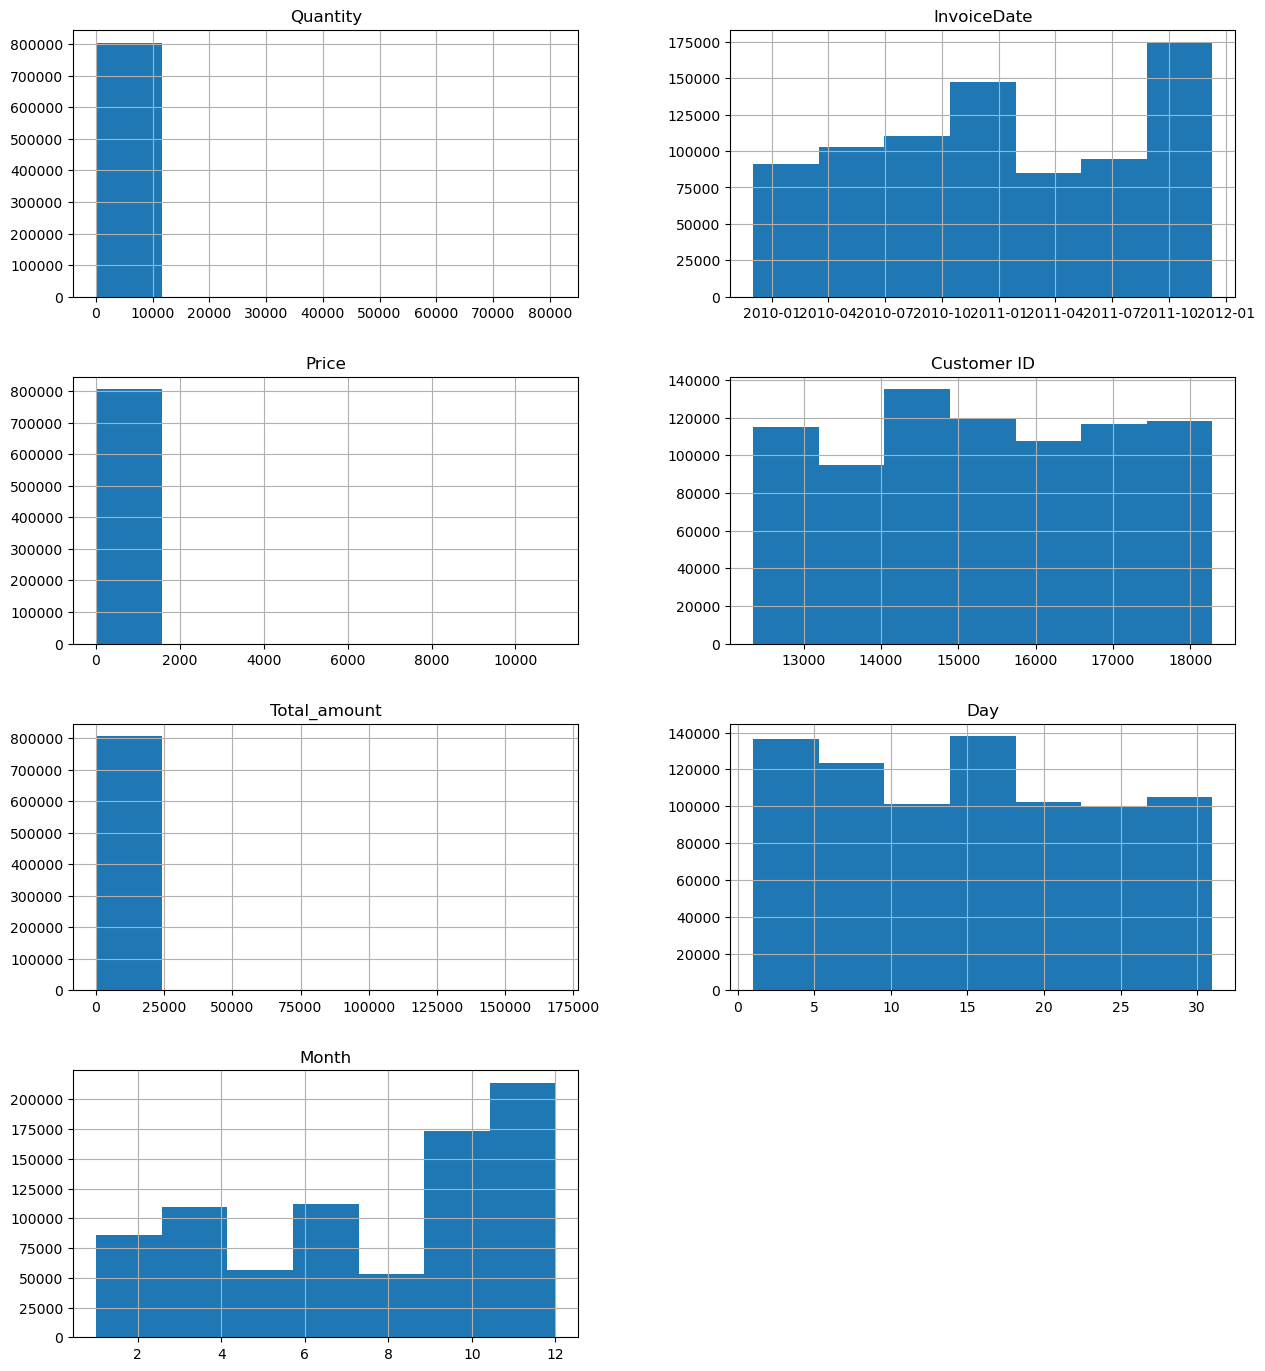

In [20]:
col=["Quantity","InvoiceDate","Price","Customer ID","Total_amount","Day","Month"]
df[col].hist(stacked=False,figsize=(15,35),bins=7,layout=(8,2))

## Outliers and statistics
>**Quantity**

the outliers of P_tilt:51994 


Text(0.5, 1.0, 'distribution for quantity')

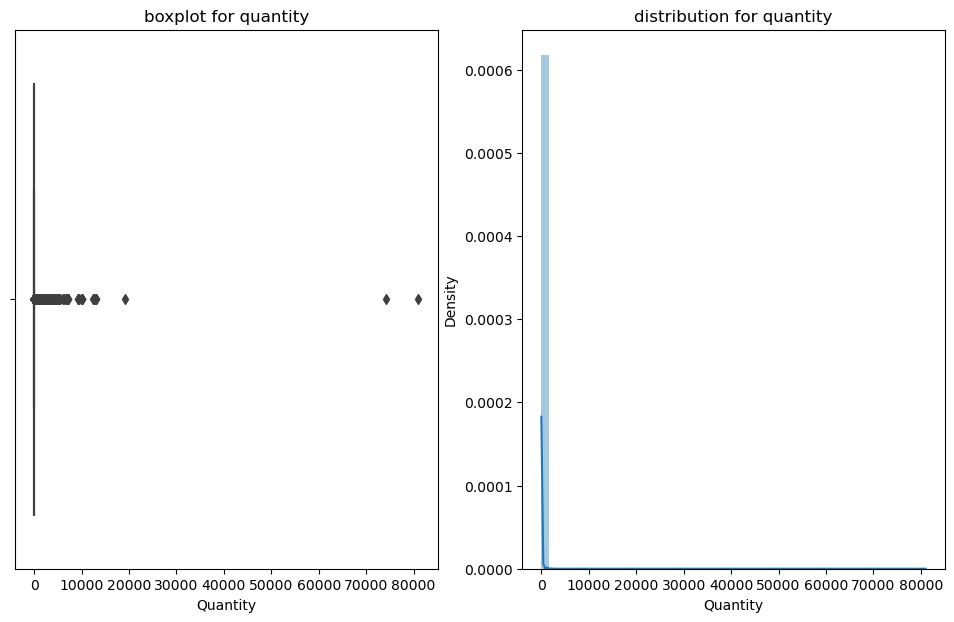

In [21]:

q25,q75=np.percentile(df["Quantity"],25),np.percentile(df["Quantity"],75)
iqr=q75-q25
cutoff=iqr*1.5
lower,upper=q25-cutoff,q75+cutoff
outliers=[i for i in df["Quantity"] if i<lower or i>upper]
print("{}the outliers of P_tilt:{} ".format("\033[1m",(len(outliers))))

fig,axes=plt.subplots(1,2,figsize=(12,7))
sns.boxplot(x=df["Quantity"],ax=axes[0])
sns.distplot(df["Quantity"],ax=axes[1])
axes[0].set_title("boxplot for quantity")
axes[1].set_title("distribution for quantity")


In [22]:
col=["Quantity","Price","Customer ID","Total_amount","Day","Month"]
for i in col:
        
        #before imputing mean 
    
        q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
        iqr=q75-q25
        cutoff=iqr*1.5
        lower,upper=q25-cutoff,q75+cutoff
        outliers=[i for i in df[i] if i<lower or i>upper]
        print("{} The outliers of {}:{} ".format("\033[1m",i,(len(outliers))))
        #outlier impute with mean values
        
         #get the mean
            
        df_inc=df.loc[(df[i]>=lower)&(df[i]<=upper)]
        mean=(df_inc[i].mean())
        print("{} The mean value of {} is {},".format("\033[1m",i,mean))
        
        # after imputing mean values
        
        df[i]=np.where(df[i]>upper,mean,df[i])
        df[i]=np.where(df[i]<lower, mean, df[i])
        outliers=[x for x in df[i]if x>upper or x<lower]
        print("{} The outlier of {} after imputing mean {},".format("\033[1m",i,len(outliers)))
        print("\n")
        


        


 The outliers of Quantity:51994 
 The mean value of Quantity is 6.885199024449793,
 The outlier of Quantity after imputing mean 0,


 The outliers of Price:67346 
 The mean value of Price is 2.2100238773138434,
 The outlier of Price after imputing mean 0,


 The outliers of Customer ID:0 
 The mean value of Customer ID is 15331.85624984484,
 The outlier of Customer ID after imputing mean 0,


 The outliers of Total_amount:66382 
 The mean value of Total_amount is 11.910190517803468,
 The outlier of Total_amount after imputing mean 0,


 The outliers of Day:0 
 The mean value of Day is 15.203903825624984,
 The outlier of Day after imputing mean 0,


 The outliers of Month:0 
 The mean value of Month is 7.507328517166902,
 The outlier of Month after imputing mean 0,




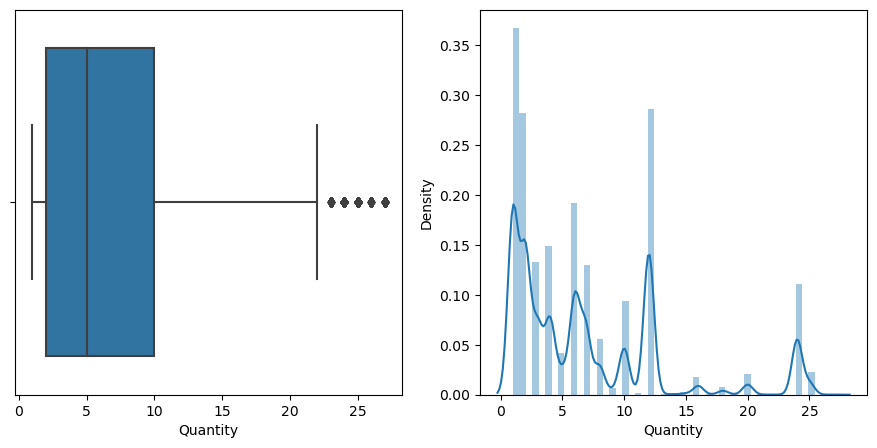

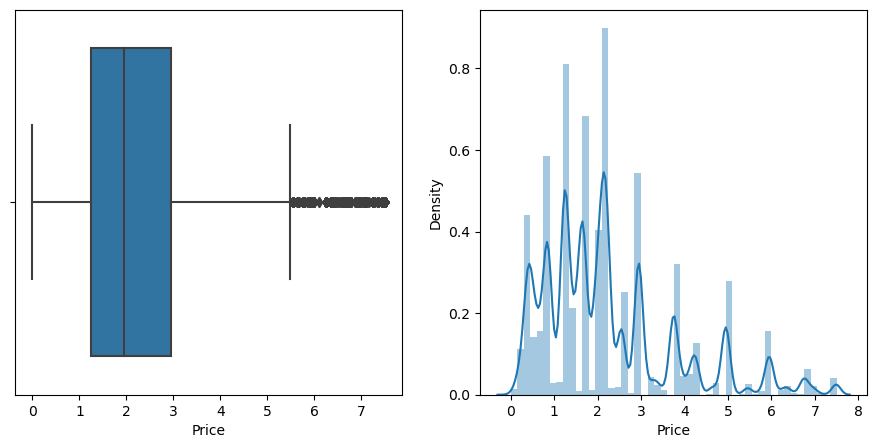

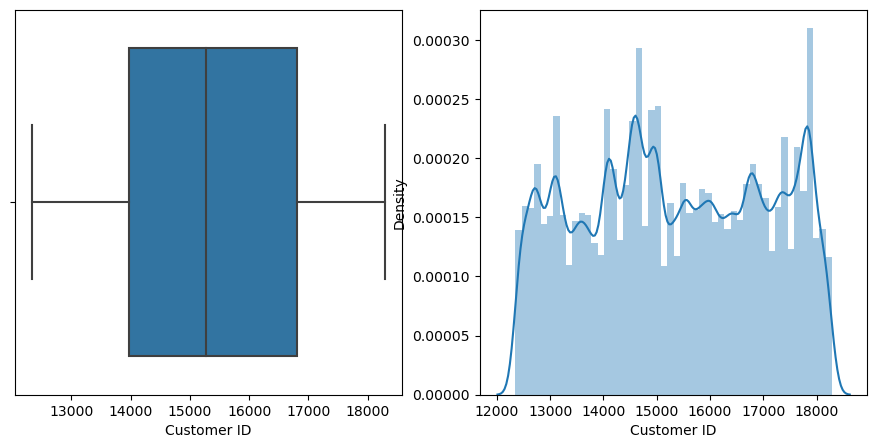

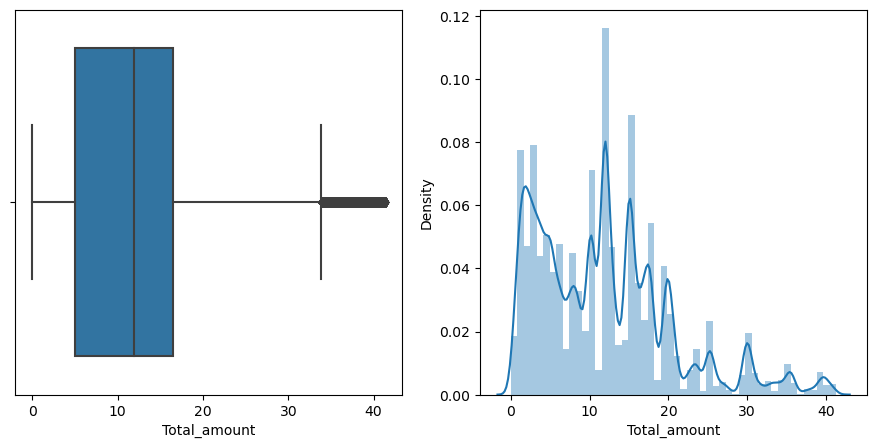

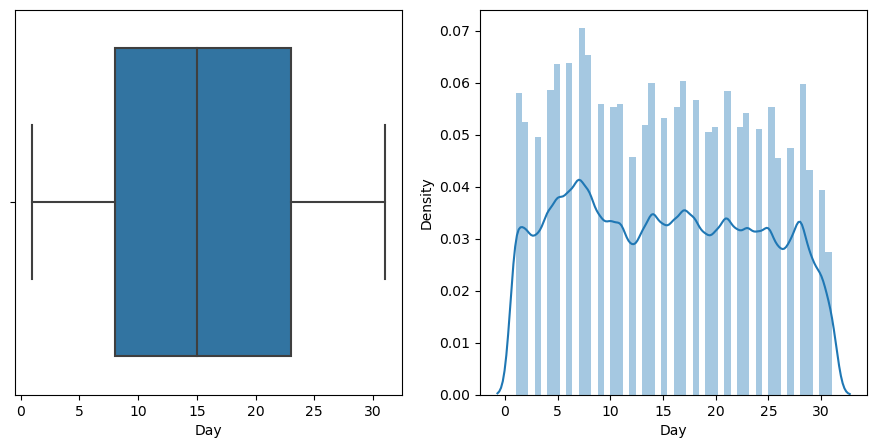

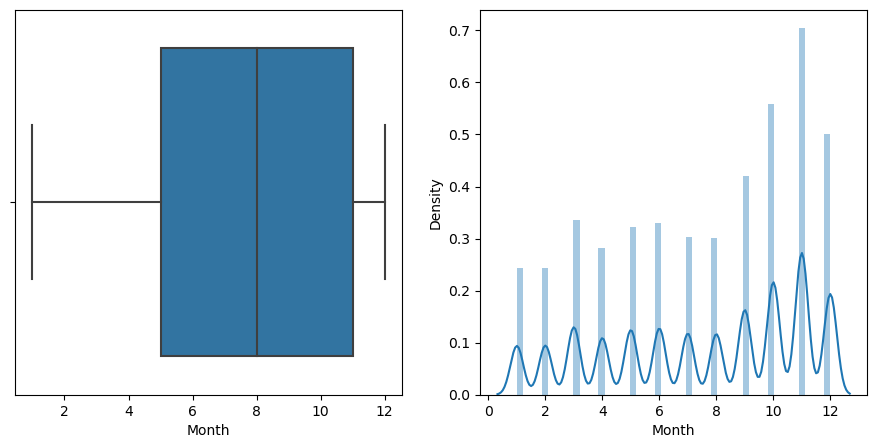

In [23]:
for i in col:
    f,axes=plt.subplots(1,2,figsize=(11,5))
    sns.boxplot(x=df[i],ax=axes[0])
    sns.distplot(df[i],ax=axes[1])

## Distribution of categorical
### year

Text(0.5, 1.0, 'year on pie plot')

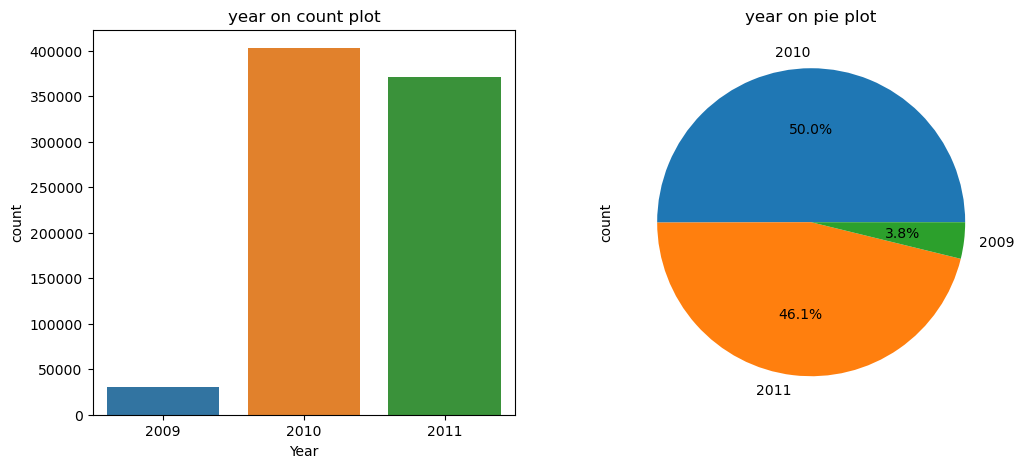

In [24]:
f,axes=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df["Year"],ax=axes[0])
df["Year"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[1])
axes[0].set_title("year on count plot")
axes[1].set_title("year on pie plot")

>**selling 2010 is more compare to other two**

### Day

Text(0.5, 1.0, 'day on pie plot')

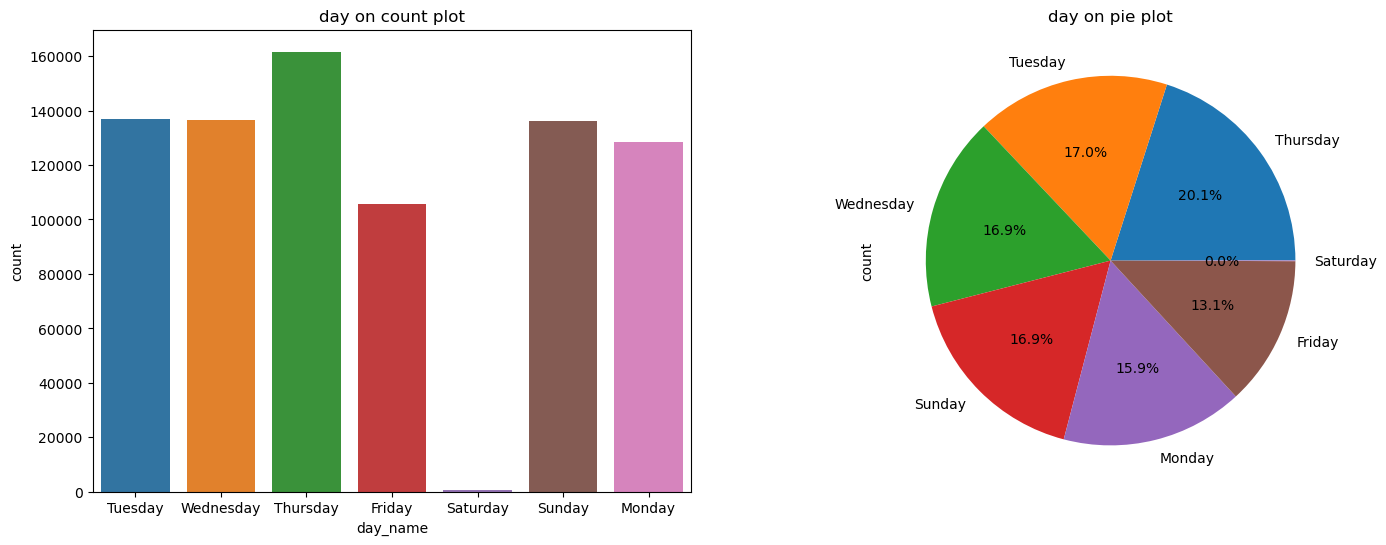

In [25]:
f,axes=plt.subplots(1,2,figsize=(17,6))
sns.countplot(x=df["day_name"],ax=axes[0])
df["day_name"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[1])
axes[0].set_title("day on count plot")
axes[1].set_title("day on pie plot")

>**by selling Moday,Tuesday,Wednesday are nearly equal distribution**.
>**Thursday is more compare to other days**

### Month

Text(0.5, 1.0, 'Month_name on pie plot')

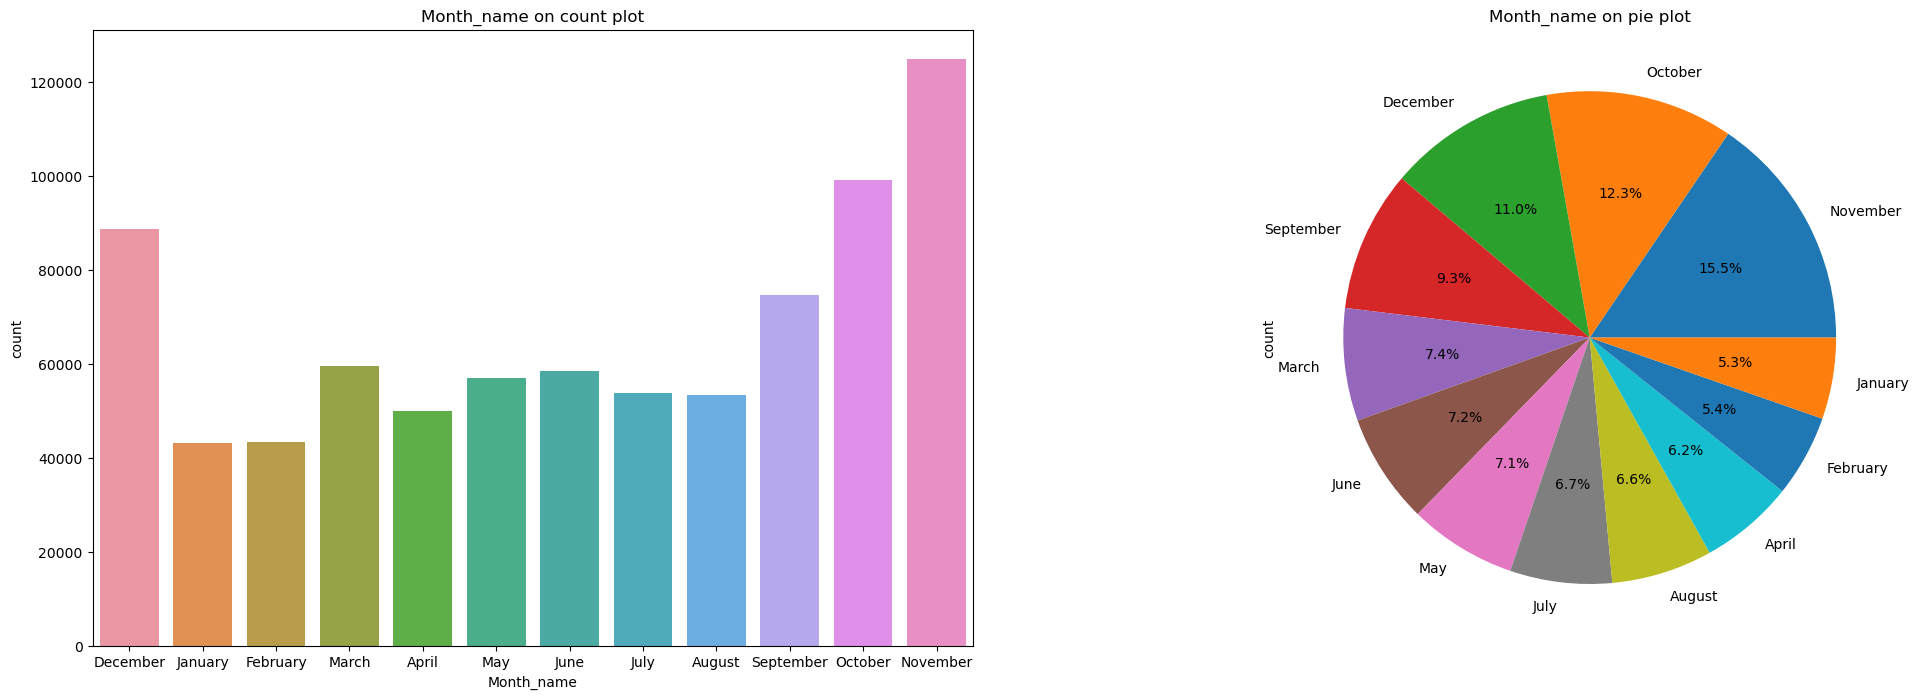

In [26]:
f,axes=plt.subplots(1,2,figsize=(25,8))
sns.countplot(x=df["Month_name"],ax=axes[0])
df["Month_name"].value_counts().plot.pie(autopct="%1.1f%%",ax=axes[1])
axes[0].set_title("Month_name on count plot")
axes[1].set_title("Month_name on pie plot")

 
>**selling on november month 15.5%.october & december are nearly equal**

# Bivariate Analysis
### year by price

Text(0.5, 1.0, 'year by price')

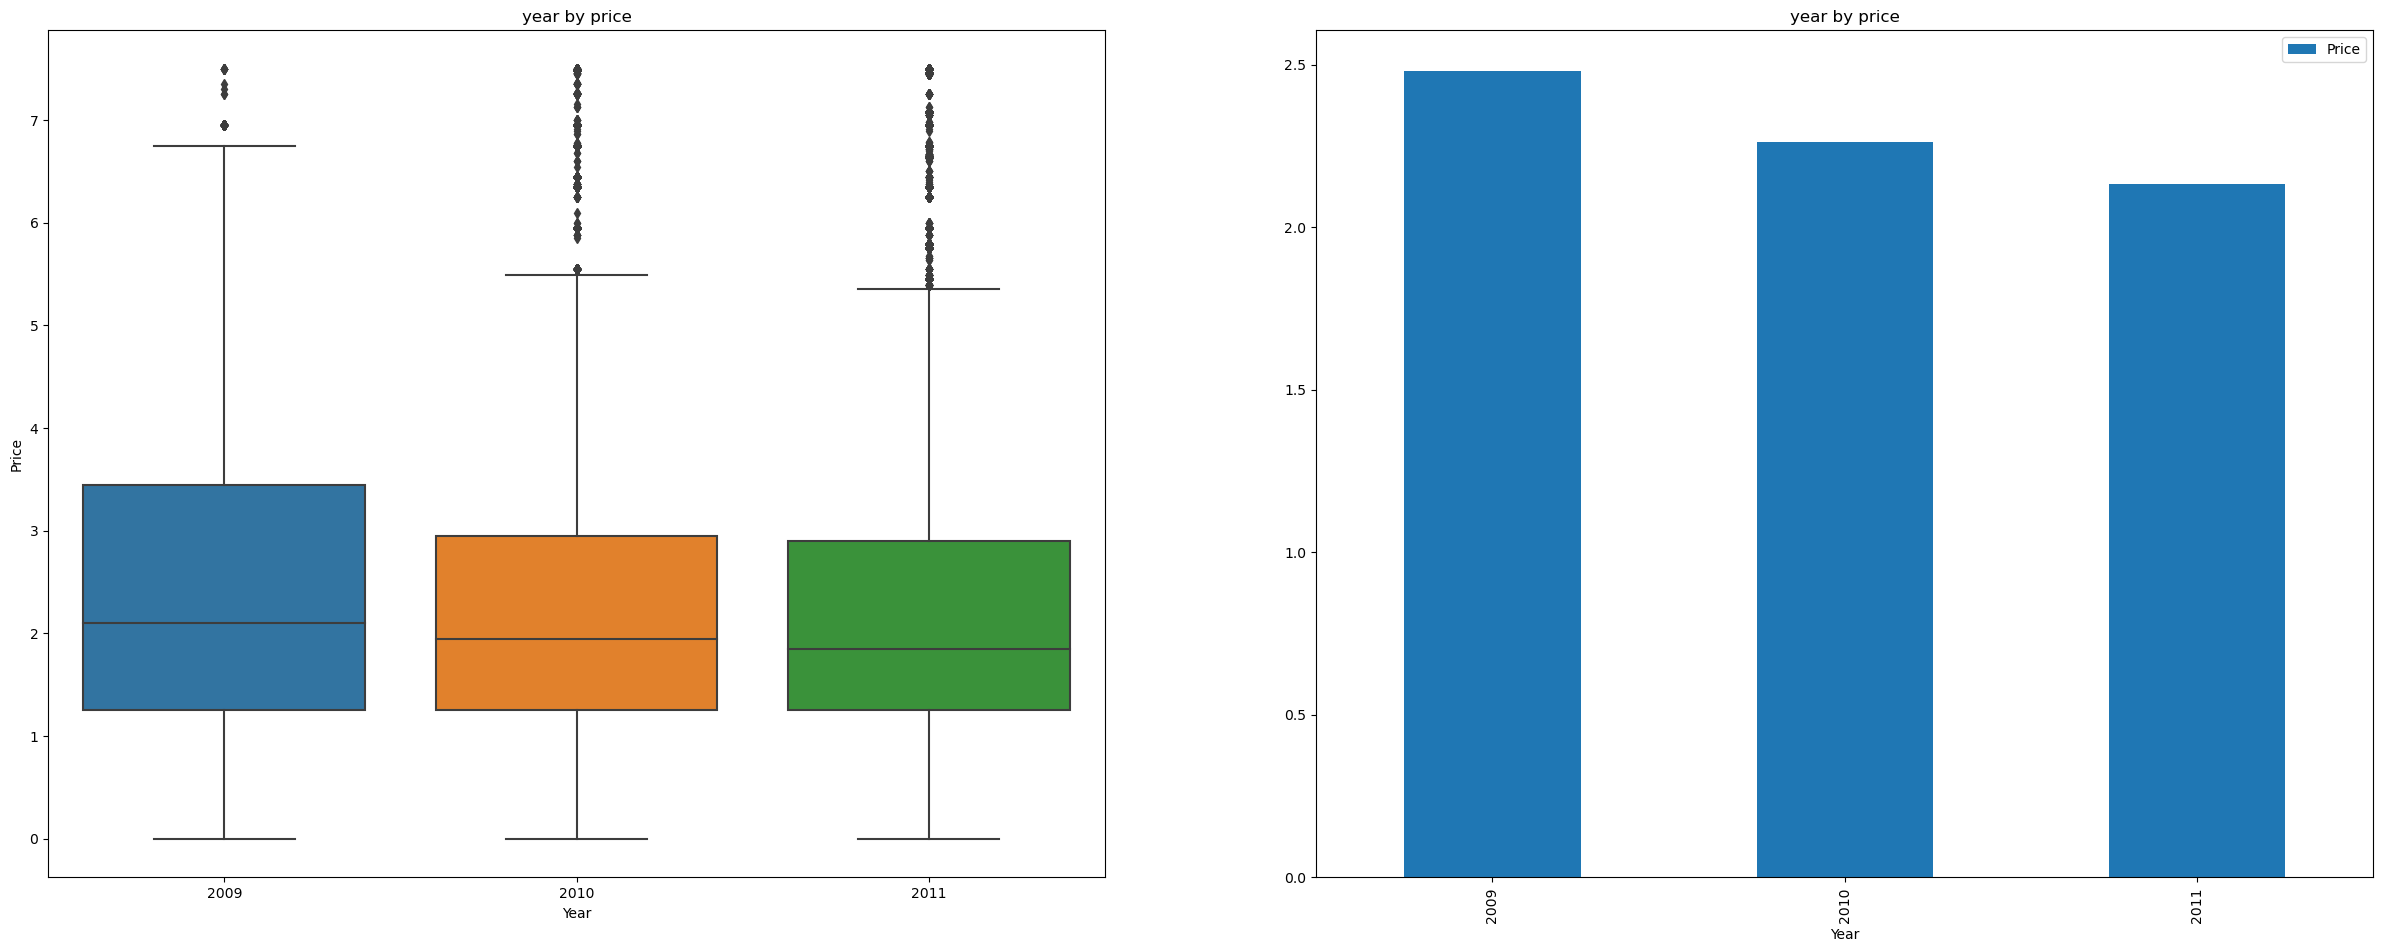

In [27]:
f,axes=plt.subplots(1,2,figsize=(30,11))
sns.boxplot(x="Year",y="Price",data=df,ax=axes[0])
df.groupby(["Year"])["Price"].mean().reset_index().sort_values(["Price"],ascending=False).plot(x="Year",y="Price",kind="bar",ax=axes[1])
axes[0].set_title("year by price")
axes[1].set_title("year by price")


>**The 2009 mean value of price is higher than 2010/11**

#### year by quantity

Text(0.5, 1.0, 'year by Quantity')

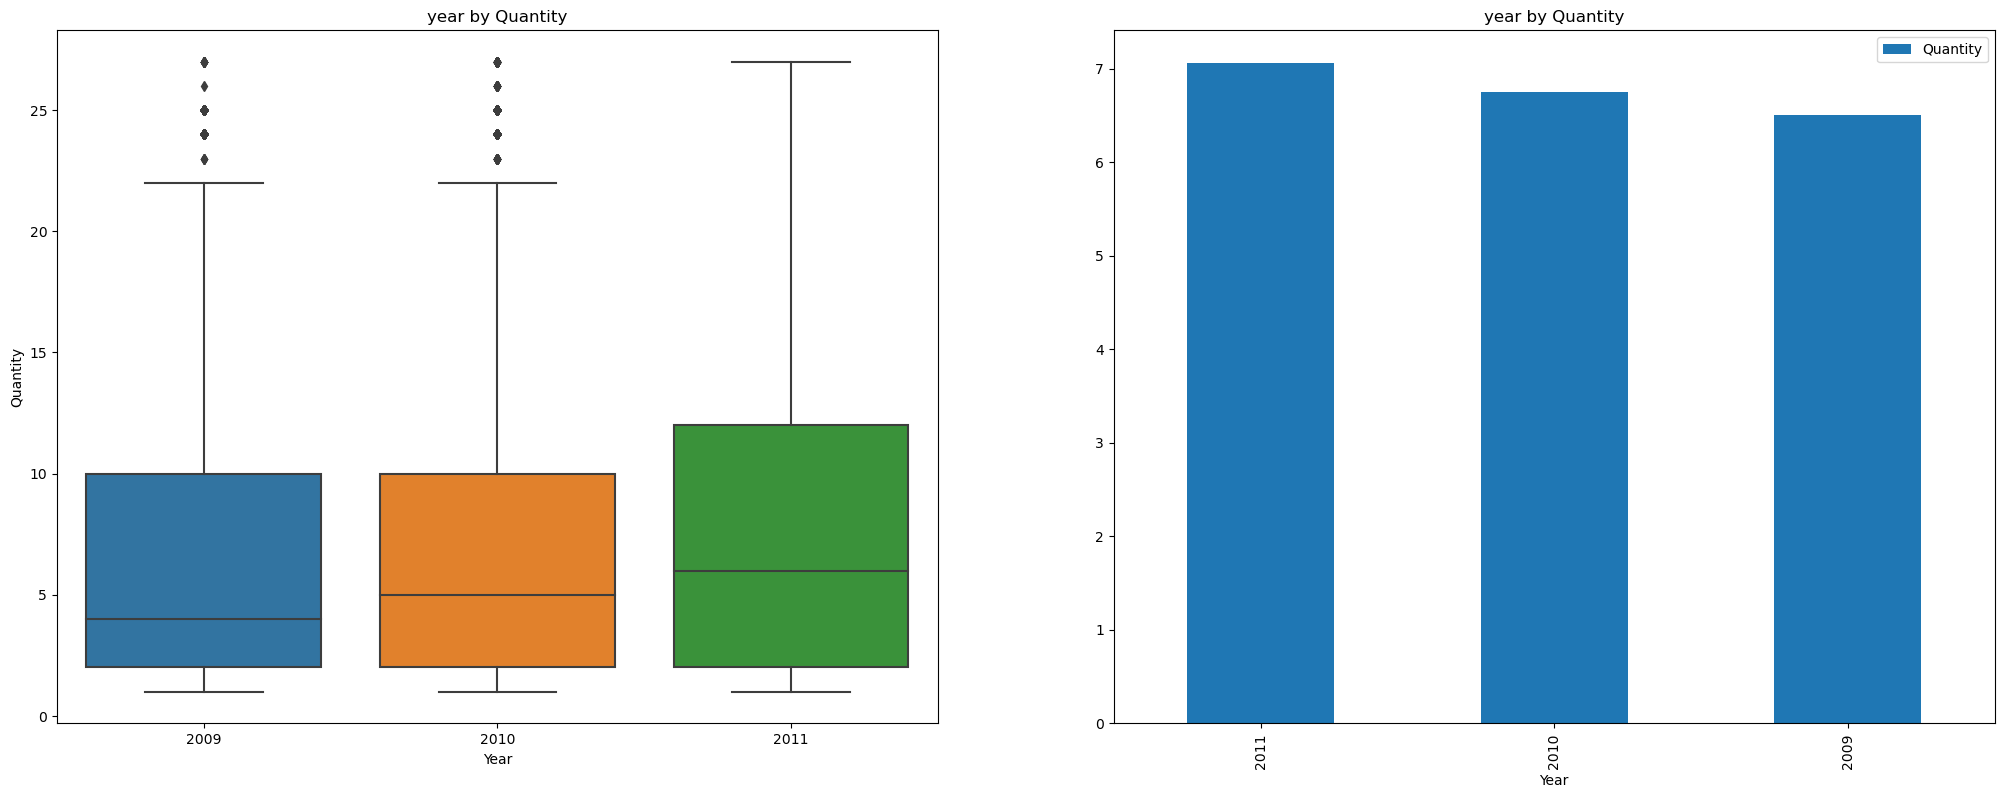

In [28]:
f,axes=plt.subplots(1,2,figsize=(25,9))
sns.boxplot(x="Year",y="Quantity",data=df,ax=axes[0])

df.groupby(["Year"])["Quantity"].mean().reset_index().sort_values(["Quantity"],ascending=False).plot(x="Year",y="Quantity",kind="bar",ax=axes[1])
axes[0].set_title("year by Quantity")
axes[1].set_title("year by Quantity")

>**the quantity of mean value high in 2011**

Text(0.5, 1.0, 'year by Total_amount')

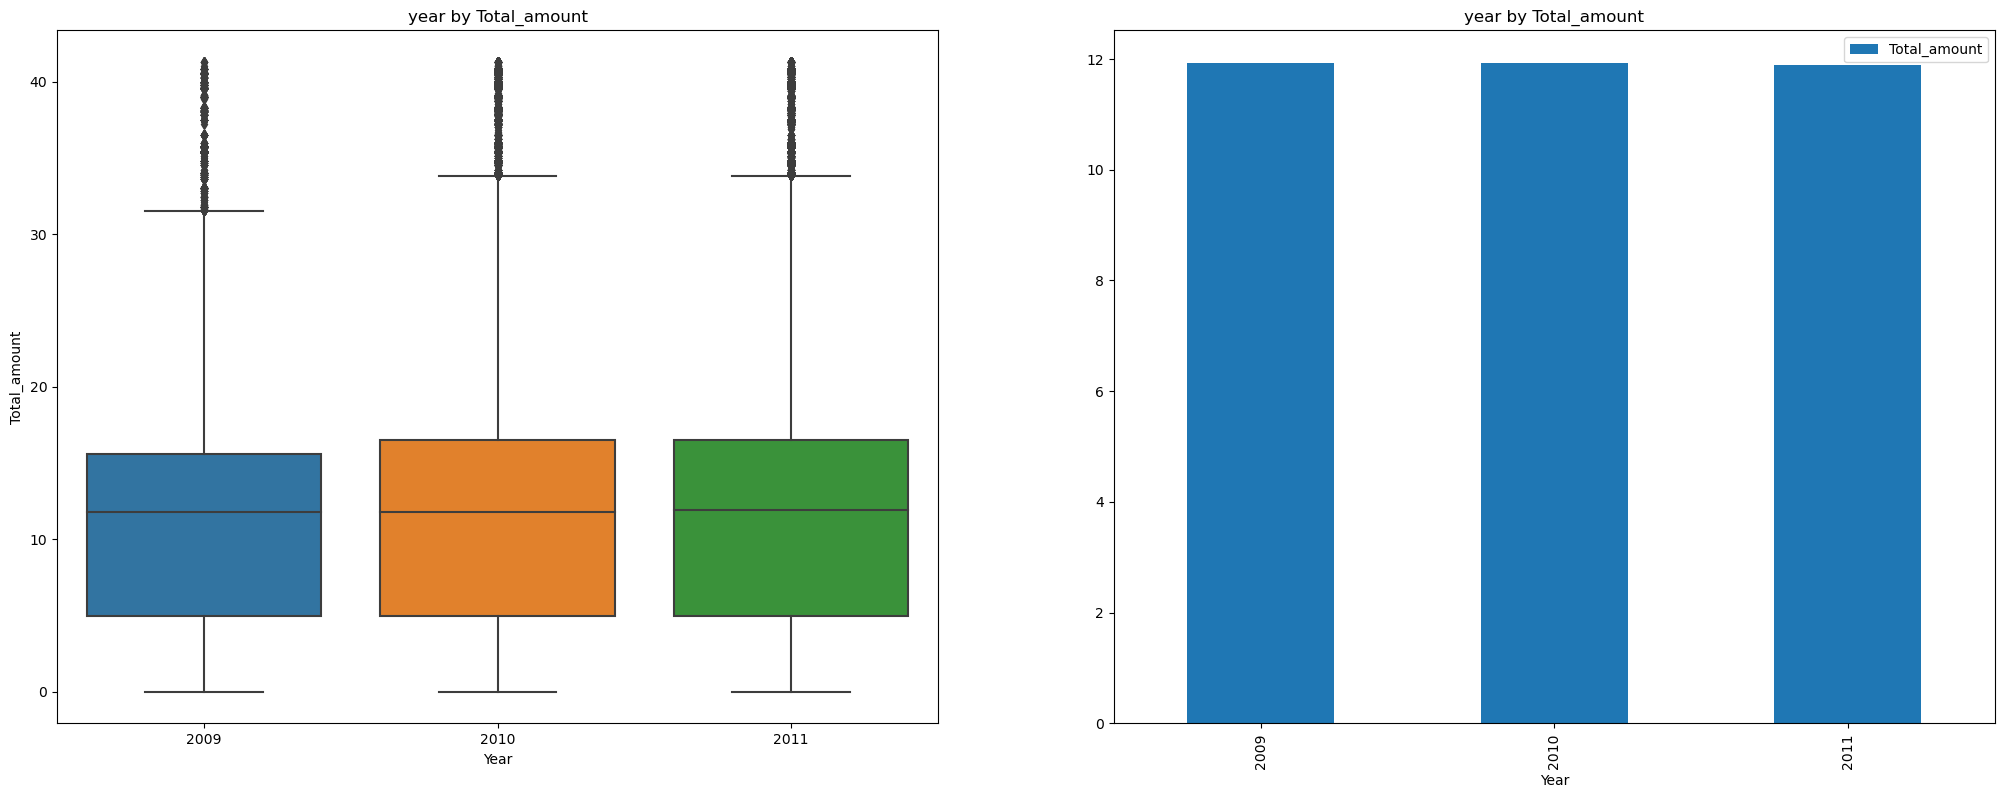

In [29]:
f,axes=plt.subplots(1,2,figsize=(25,9))
sns.boxplot(x="Year",y="Total_amount",data=df,ax=axes[0])

df.groupby(["Year"])["Total_amount"].mean().reset_index().sort_values(["Total_amount"],ascending=False).plot(x="Year",y="Total_amount",kind="bar",ax=axes[1])
axes[0].set_title("year by Total_amount")
axes[1].set_title("year by Total_amount")

>**we can see total amount of mean values nearly equal to 2010/2011**

### TOP 10 HIGHEST SPENDING CUSTOMER  (customer id vs total amount)

      Customer ID   Total_amount
2541      14911.0  193964.211102
1791      14156.0   63127.333575
5436      17841.0   61868.979623
739       13089.0   60783.733172
1933      14298.0   56624.848214
5445      17850.0   49955.628959
2279      14646.0   46642.330220
1732      14096.0   44169.612388
400       12748.0   41199.676863
731       13081.0   39894.302202


<Axes: xlabel='Customer ID', ylabel='Total_amount'>

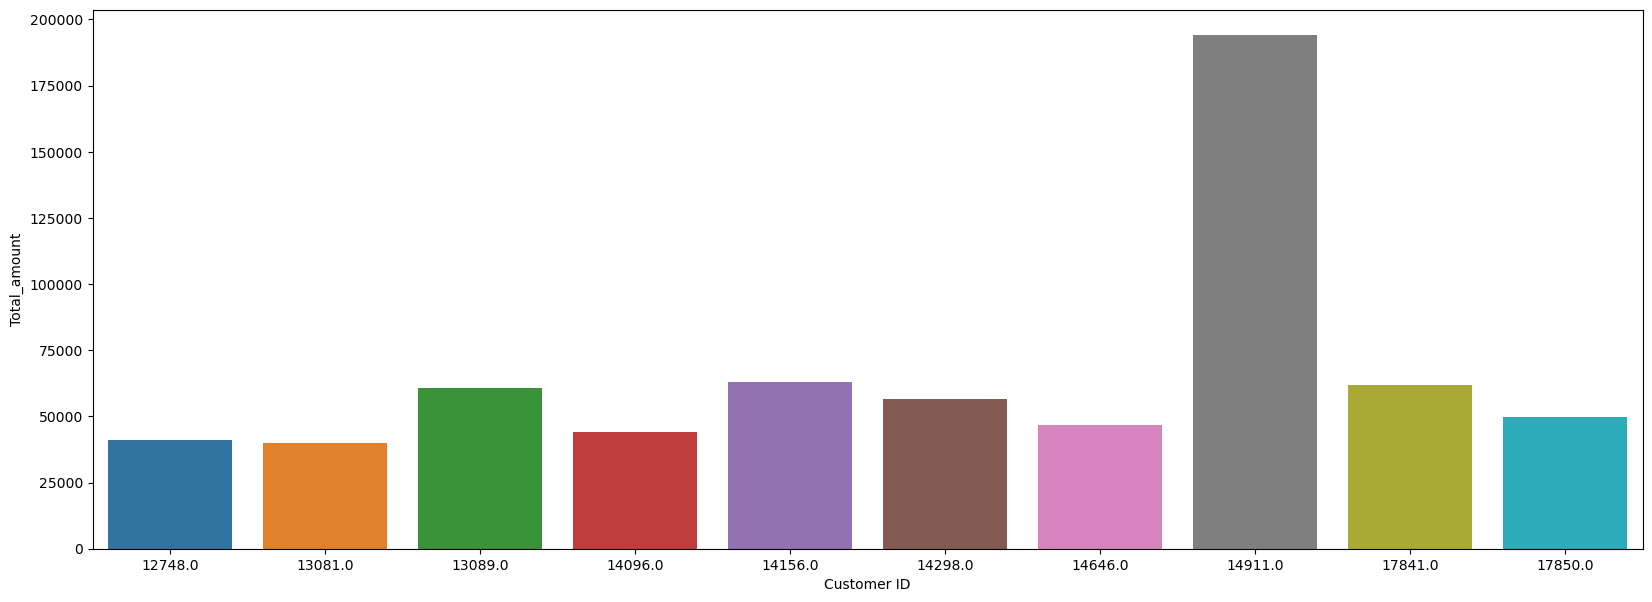

In [30]:
Top10Spending=df.groupby('Customer ID')['Total_amount'].sum().reset_index().sort_values('Total_amount',ascending=False).head(10)
print(Top10Spending)
plt.figure(figsize=(20,7))
sns.barplot(x=Top10Spending["Customer ID"],y=Top10Spending["Total_amount"])

>**The 14911 customer was spend the amount highly compare to other**

### TOP 10 CUSTOMER SPEND AVGERAGE AMOUNT

      Customer ID  Total_amount
3838      16219.0         40.80
1901      14266.0         40.56
1722      14086.0         39.95
3318      15693.0         37.50
3562      15940.0         35.80
4581      16970.0         35.70
4035      16417.0         35.70
2209      14576.0         35.40
5134      17533.0         34.80
1544      13907.0         34.20


<Axes: xlabel='Customer ID', ylabel='Total_amount'>

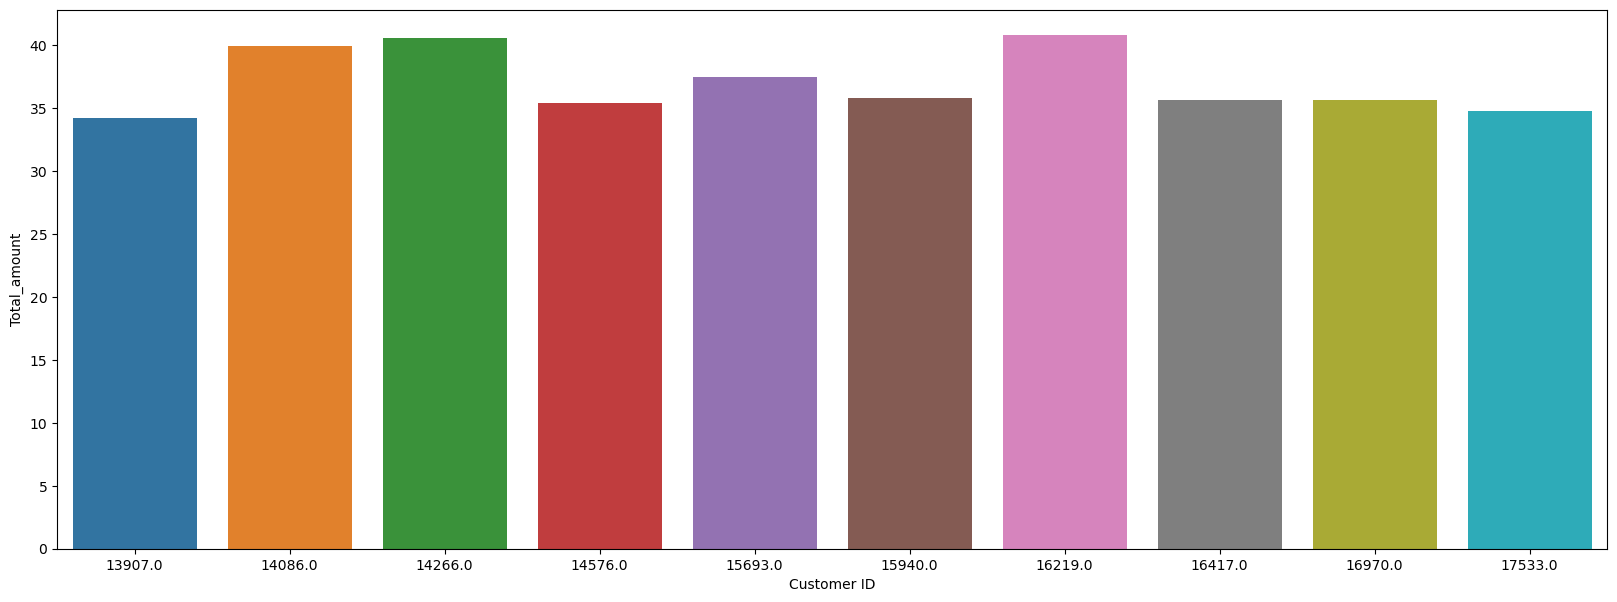

In [31]:
Top10Spendavg=df.groupby('Customer ID')['Total_amount'].mean().reset_index().sort_values('Total_amount',ascending=False).head(10)
print(Top10Spendavg)
plt.figure(figsize=(20,7))
sns.barplot(x=Top10Spendavg["Customer ID"],y=Top10Spendavg["Total_amount"])

>**162119 he was spend the avarage amount for purchase**

#### TOP 5 COUNTRY CONTRIBUTE THE HIGHEST REVENUE TO STORE(country vs total amount)

<Axes: xlabel='Country', ylabel='Total_amount'>

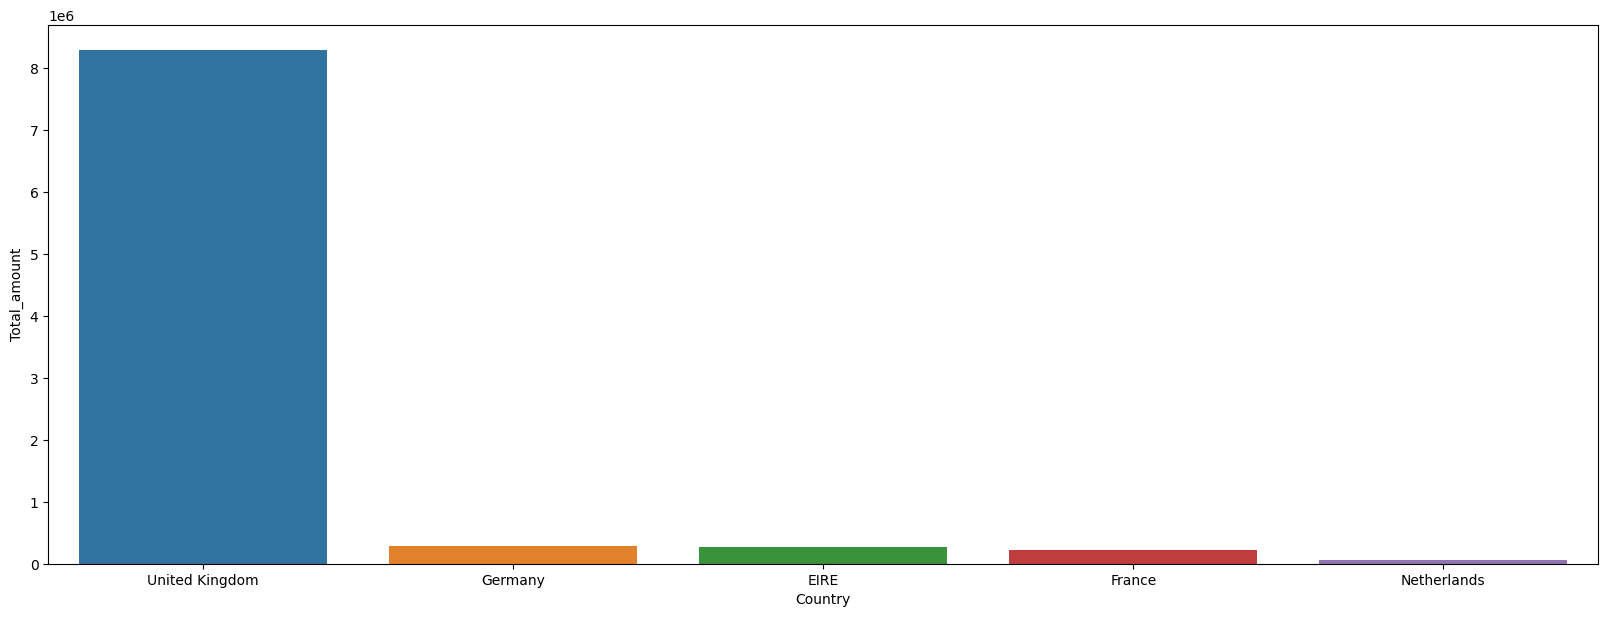

In [32]:
top10con=df.groupby(["Country"])["Total_amount"].sum().reset_index().sort_values("Total_amount",ascending=False).head(5)
plt.figure(figsize=(20,7))
sns.barplot(x=top10con["Country"],y=top10con["Total_amount"])

>**United Kingdom was hightest contribute to the store**

### SALES BY MONTH (month name vs total amount)

<Axes: xlabel='Month_name', ylabel='Total_amount'>

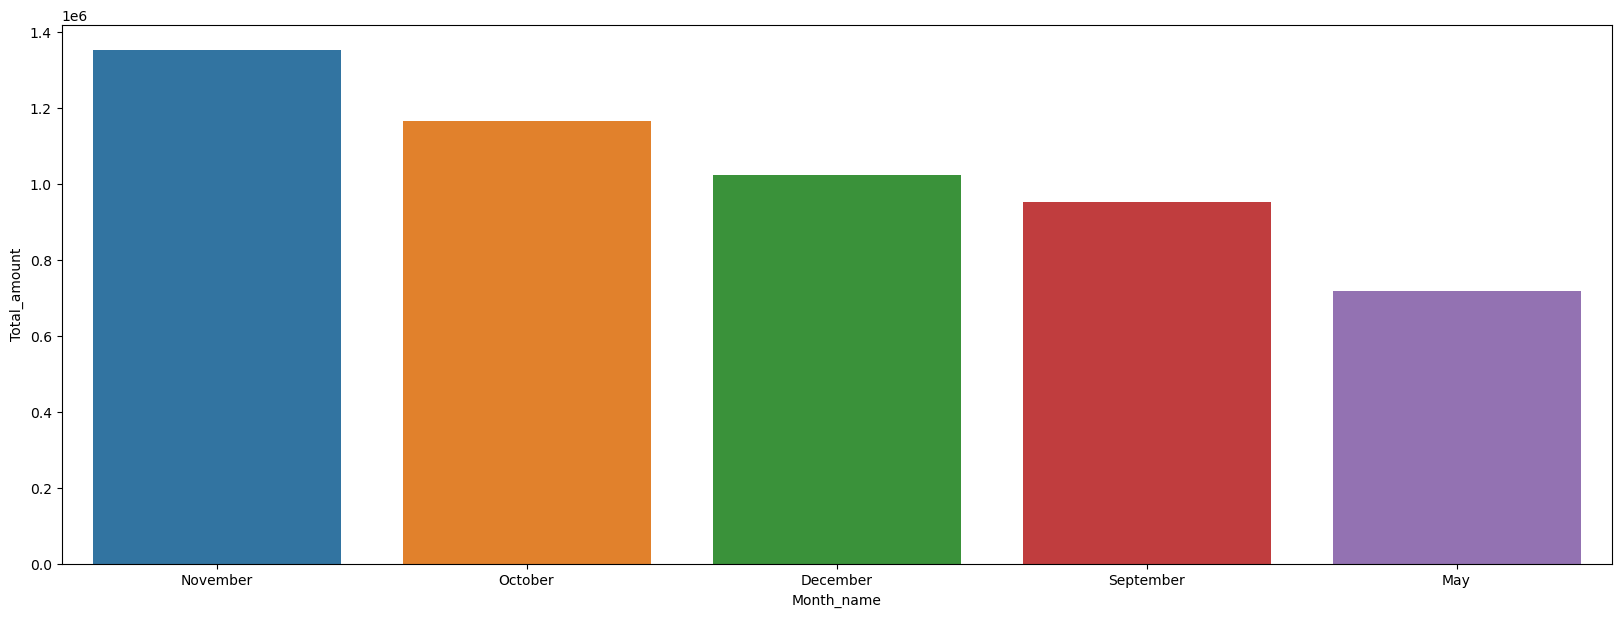

In [33]:
salesbymon=df.groupby(["Month_name"])["Total_amount"].sum().reset_index().sort_values("Total_amount",ascending=False).head(5)
plt.figure(figsize=(20,7))
sns.barplot(x=salesbymon["Month_name"],y=salesbymon["Total_amount"])

>**The highest sale was happend november**

### SALES BY DIFFERENTS DAYS (day name vs total amount)

<Axes: xlabel='day_name', ylabel='Total_amount'>

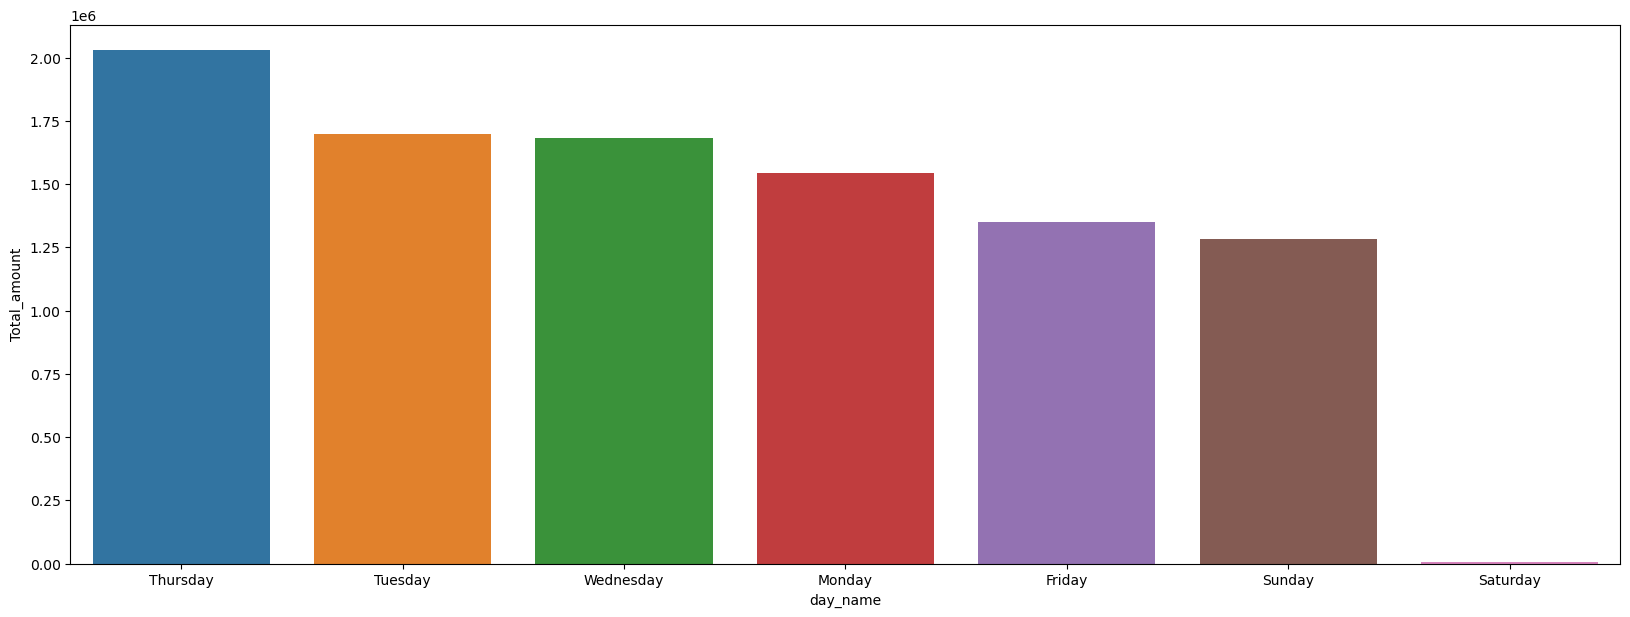

In [34]:
salesbyday=df.groupby(["day_name"])["Total_amount"].sum().reset_index().sort_values("Total_amount",ascending=False).head(7)
plt.figure(figsize=(20,7))
sns.barplot(x=salesbyday["day_name"],y=salesbyday["Total_amount"])

>**High sale on thursday,very low sale in saturday**

### SALES BY TIMINGS 

In [35]:
# find unique values
df.Hour.unique()

array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8, 20,  6],
      dtype=int64)

In [36]:
#by using if condition 6-11 mor and 12 to 5 afternoon else evening
def time(time):
    if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
        return " morning"
    elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
        return "afternoon"
    else :
        return "eveninig"
        

In [37]:
df["day_by_hr"]=df["Hour"].apply(time)

In [38]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,Month_name,day_name,Total_amount,day_by_hr
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning


   day_by_hr  Total_amount
1  afternoon  6.216611e+06
0    morning  3.199206e+06
2   eveninig  1.792709e+05


<Axes: xlabel='day_by_hr', ylabel='Total_amount'>

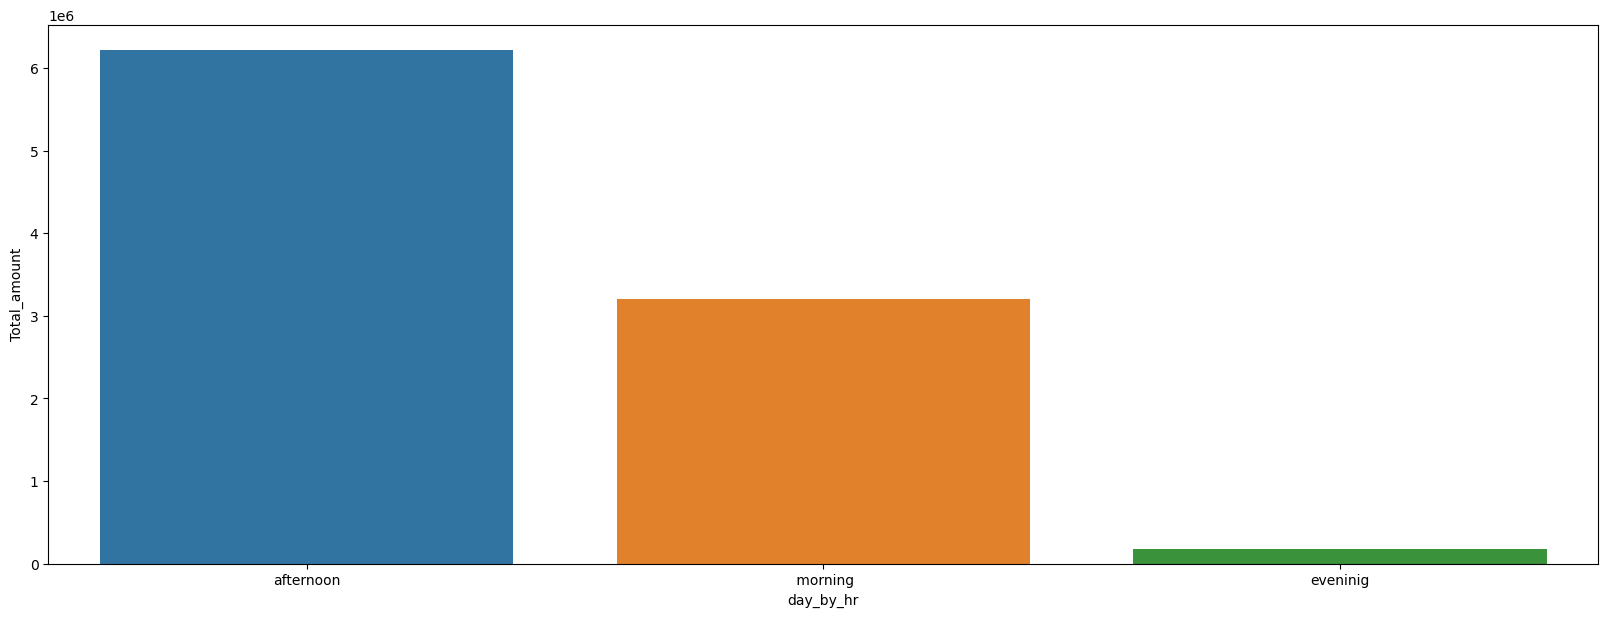

In [39]:
salebytime=df.groupby(["day_by_hr"])["Total_amount"].sum().reset_index().sort_values(["Total_amount"],ascending=False).head(10)
print(salebytime)
plt.figure(figsize=(20,7))
sns.barplot(x=salebytime["day_by_hr"],y=salebytime["Total_amount"])

>**The high sale on afternoon timings**

## MULTIVARIATE  ANALYSIS

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       805620 non-null  object        
 1   StockCode     805620 non-null  object        
 2   Description   805620 non-null  object        
 3   Quantity      805620 non-null  float64       
 4   InvoiceDate   805620 non-null  datetime64[ns]
 5   Price         805620 non-null  float64       
 6   Customer ID   805620 non-null  float64       
 7   Country       805620 non-null  object        
 8   Year          805620 non-null  int64         
 9   Month         805620 non-null  float64       
 10  Day           805620 non-null  float64       
 11  Hour          805620 non-null  int64         
 12  Month_name    805620 non-null  object        
 13  day_name      805620 non-null  object        
 14  Total_amount  805620 non-null  float64       
 15  day_by_hr     805620 

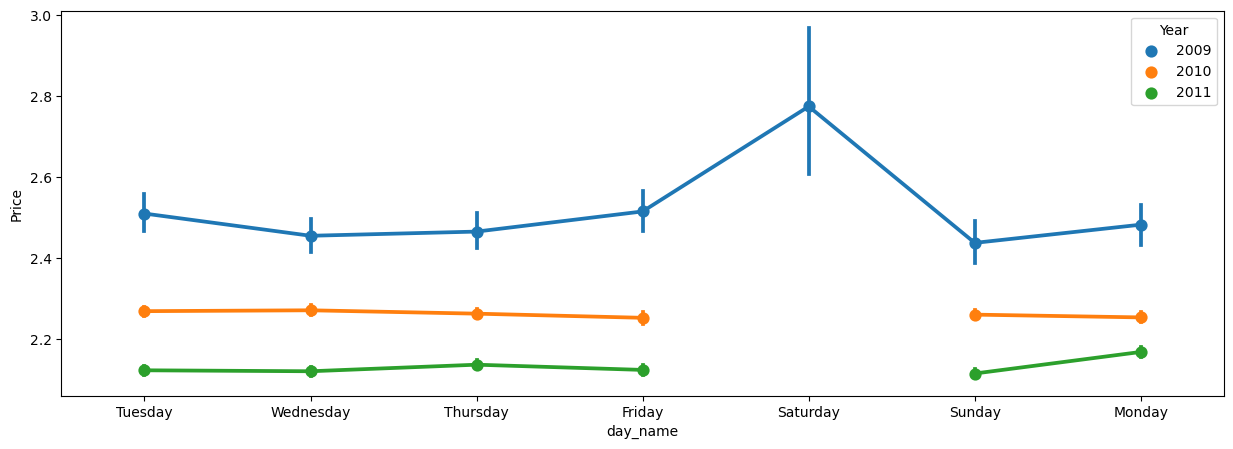

In [41]:
plt.figure(figsize=(15,5))
sns.pointplot(x="day_name", y="Price", hue = 'Year',  data=df)
plt.show()

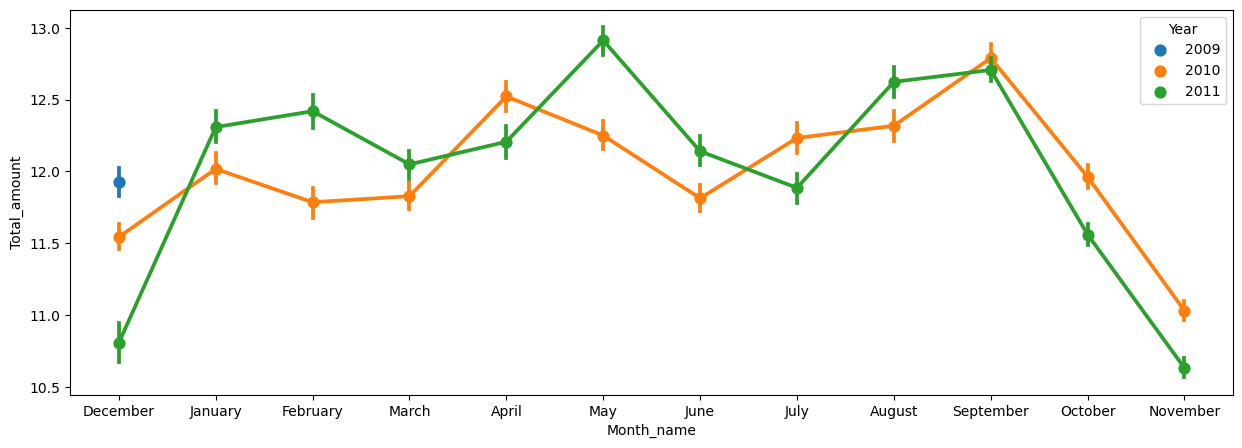

In [42]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Month_name", y="Total_amount", hue = 'Year',  data=df)
plt.show()

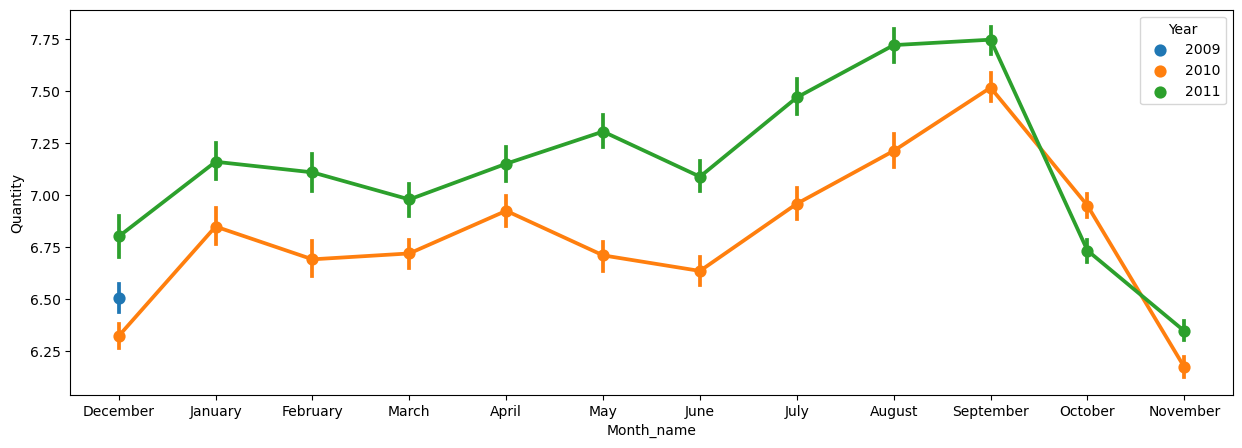

In [43]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Month_name", y="Quantity", hue = 'Year',  data=df)
plt.show()

# MODEL BUILDING

>**build a machine learning model that predicts whether an online customer of a retail shop will make their next purchase 90 days from the day they made their last purchase.**
##### steps by
#####  * To find min date purchase by customer - max date purchase by customer,
#####  * Then get next purchase day by customer
#####   * by using the customer segmentaion analysis - RFM analysis ..to find the best  
#####   * RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.
#####   *  Recency: Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.....How recently did the customer visit our website or how recently did a customer purchase?
#####   * Frequency: Customers purchase behaviour based on the number of times they buy from the online retail shop.....How often do they visit or how often do they purchase?
#####   * Monetary Value/Revenue: Customers purchase behaviour based the revenue they generate.....How much revenue we get from their visit or how much do they spend when they purchase?
#####     * find nextpurchase range 1>90
#####    * after apply k means assign the score
#####

In [44]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,Month_name,day_name,Total_amount,day_by_hr
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.000000,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
1,489434,79323P,PINK CHERRY LIGHTS,12.000000,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
2,489434,79323W,WHITE CHERRY LIGHTS,12.000000,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",6.885199,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.000000,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,30.000000,morning


In [45]:
cus_date = df[(df.InvoiceDate<pd.Timestamp(2011,12,9))&(df.InvoiceDate>=pd.Timestamp(2009,12,1))]
#total frist date to last date 


In [46]:
next_quarter = df[(df.InvoiceDate<pd.Timestamp(2012,3,9))&(df.InvoiceDate>=pd.Timestamp(2011,9,1))]
#calculate the quater date assume last date -next 90 days

In [47]:
#create the dataframe for customer id
cus= pd.DataFrame(cus_date['Customer ID'].unique())
cus.columns = ['Customer ID']

cus.head()

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0


In [48]:
#min date for customer
min_date=next_quarter.groupby('Customer ID').InvoiceDate.min().reset_index()
min_date.columns=['Customer ID',"min_date"]
#max date for customer
max_date = cus_date.groupby('Customer ID').InvoiceDate.max().reset_index()
max_date.columns=["Customer ID","max_date"]
#next puchase day (min -max)
cus['NextPurchaseDay'] =(min_date['min_date']-max_date["max_date"]).dt.days
cus.head()



,Customer ID,NextPurchaseDay
0,13085.0,286.0
1,13078.0,-74.0
2,15362.0,56.0
3,18102.0,-62.0
4,12682.0,287.0


In [49]:
#fill null values impute with mean
cus=cus.fillna(cus["NextPurchaseDay"].mean())
cus["NextPurchaseDay"]=cus["NextPurchaseDay"].astype("int")
cus.head()

,Customer ID,NextPurchaseDay
0,13085.0,286
1,13078.0,-74
2,15362.0,56
3,18102.0,-62
4,12682.0,287


In [50]:
""""#find frist and last date
import time
cu_date=df[(df.InvoiceDate<pd.Timestamp(2011,12,9))&(df.InvoiceDate>=pd.Timestamp(2009,12,1))].reset_index()


#quater date i.e 3 months(assume chance to next 90 days purchase from last day purchase)
cu_quaterdate=df[(df.InvoiceDate<=pd.Timestamp(2012,3,10))&(df.InvoiceDate>=pd.Timestamp(2011,12,9))].reset_index()


cus_id=pd.DataFrame(cu_date["Customer ID"].unique())
cus_id.columns=["customerid"]
cus_id"""

'"#find frist and last date\nimport time\ncu_date=df[(df.InvoiceDate<pd.Timestamp(2011,12,9))&(df.InvoiceDate>=pd.Timestamp(2009,12,1))].reset_index()\n\n\n#quater date i.e 3 months(assume chance to next 90 days purchase from last day purchase)\ncu_quaterdate=df[(df.InvoiceDate<=pd.Timestamp(2012,3,10))&(df.InvoiceDate>=pd.Timestamp(2011,12,9))].reset_index()\n\n\ncus_id=pd.DataFrame(cu_date["Customer ID"].unique())\ncus_id.columns=["customerid"]\ncus_id'

In [51]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour,Month_name,day_name,Total_amount,day_by_hr
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.000000,2009-12-01 07:45:00,6.950000,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
1,489434,79323P,PINK CHERRY LIGHTS,12.000000,2009-12-01 07:45:00,6.750000,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
2,489434,79323W,WHITE CHERRY LIGHTS,12.000000,2009-12-01 07:45:00,6.750000,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",6.885199,2009-12-01 07:45:00,2.100000,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,11.910191,morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.000000,2009-12-01 07:45:00,1.250000,13085.0,United Kingdom,2009,12.0,1.0,7,December,Tuesday,30.000000,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.000000,2011-12-09 12:50:00,2.100000,12680.0,France,2011,12.0,9.0,12,December,Friday,12.600000,afternoon
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.000000,2011-12-09 12:50:00,4.150000,12680.0,France,2011,12.0,9.0,12,December,Friday,16.600000,afternoon
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.000000,2011-12-09 12:50:00,4.150000,12680.0,France,2011,12.0,9.0,12,December,Friday,16.600000,afternoon
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3.000000,2011-12-09 12:50:00,4.950000,12680.0,France,2011,12.0,9.0,12,December,Friday,14.850000,afternoon


## Recency

In [52]:
#recency-latest date - last invoice date ,
#frequecy - count of invoice no
# revenue=total amount of each customer
import datetime as dt
latest_date=dt.datetime(2011,12,10)

#find the rfm analysis = recency
#rfm_dataframe = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'Invoice': lambda x: len(x), 'Total_amount': lambda x: x.sum()})


rfm=df.groupby("Customer ID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days})

rfm['InvoiceDate']=rfm["InvoiceDate"].astype("int")

# change the column name
rfm_recency=rfm.rename(columns={"InvoiceDate":"Recency"})
print(rfm_recency)

# descriptive recency summary
rfm_recency.describe()

             Recency
Customer ID         
12346.0          325
12347.0            2
12348.0           75
12349.0           18
12350.0          310
...              ...
18283.0            3
18284.0          431
18285.0          660
18286.0          476
18287.0           42

[5881 rows x 1 columns]


,Recency
count,5881.000000
mean,200.992858
std,209.489651
min,0.000000
25%,25.000000
50%,95.000000
75%,379.000000
max,738.000000


Text(0.5, 1.0, 'Distribution for recency')

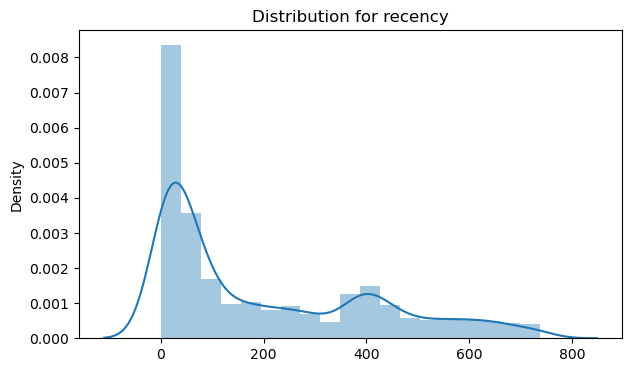

In [53]:
plt.figure(figsize=(7,4))
sns.distplot(x=rfm_recency["Recency"])
plt.title("Distribution for recency")

>**reccency distribution is right skew**

[258049173.70005208, 49788054.52776596, 23124117.15732885, 11105733.703342427, 7808694.780688927, 5472312.054258255, 3813867.7152001327, 2969606.229879277, 2382733.9054830433]


Text(0.5, 1.0, 'Elbow method')

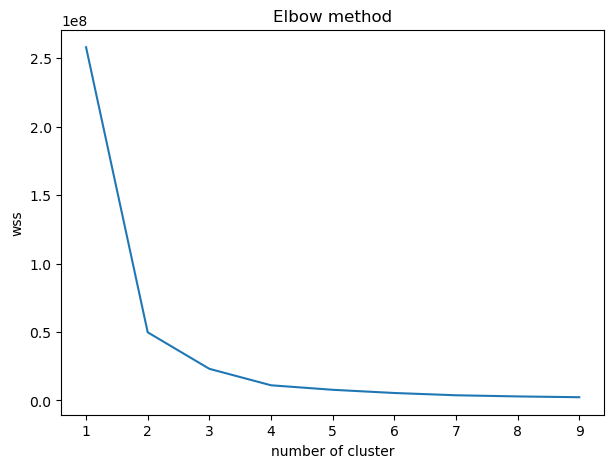

In [54]:
from sklearn.cluster import KMeans
#apply the kmeans clustering to assign the cluster for recency
wss=[]
rfm_recency_cluster=rfm_recency[["Recency"]]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(rfm_recency_cluster)
    wss.append(kmeans.inertia_)
print(wss)

#elbow method
plt.figure(figsize=(7,5))
plt.plot(range(1,10),wss)
plt.xlabel("number of cluster")
plt.ylabel("wss")
plt.title("Elbow method")

>**4 is optimum value**

In [55]:
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(rfm_recency_cluster)
rfm_recency["Recency_cluster"]=kmeans.labels_
rfm_recency


,Recency,Recency_cluster
Customer ID,,
12346.0,325,0
12347.0,2,1
12348.0,75,1
12349.0,18,1
12350.0,310,3
...,...,...
18283.0,3,1
18284.0,431,0
18285.0,660,2


#### recency descriptive statistics summary

In [56]:
rfm_recency.groupby("Recency_cluster").describe()

Recency                                                       \
                  count        mean        std    min     25%    50%     75%   
Recency_cluster                                                                
0                1110.0  412.136036  47.409850  313.0  379.00  408.0  441.75   
1                3144.0   37.355916  31.370340    0.0   11.00   28.5   59.00   
2                 639.0  621.784038  64.126763  518.0  568.00  619.0  669.50   
3                 988.0  212.349190  54.161346  126.0  165.75  211.0  260.00   

                        
                   max  
Recency_cluster         
0                516.0  
1                124.0  
2                738.0  
3                312.0

## Frequency

In [57]:
rfm_frequency=df.groupby("Customer ID").agg({"Invoice":lambda x:len(x)})
rfm_frequency=rfm_frequency.rename(columns={"Invoice":"Frequency"})
print(rfm_frequency)
#rfm frequency descriptive summary
rfm_frequency.describe()


             Frequency
Customer ID           
12346.0             34
12347.0            253
12348.0             51
12349.0            175
12350.0             17
...                ...
18283.0            986
18284.0             28
18285.0             12
18286.0             67
18287.0            155

[5881 rows x 1 columns]


,Frequency
count,5881.000000
mean,136.986907
std,353.779018
min,1.000000
25%,21.000000
50%,53.000000
75%,142.000000
max,12890.000000


Text(0.5, 1.0, 'Distribution for Frequency')

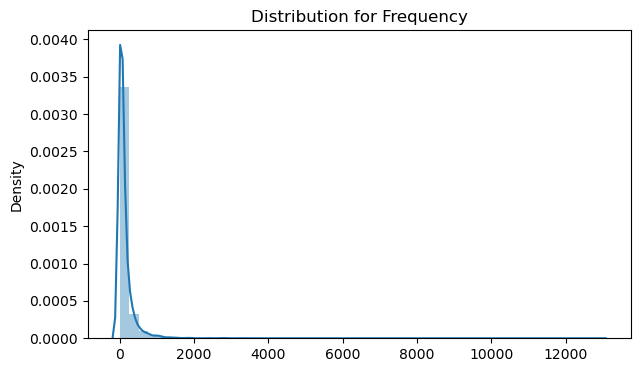

In [58]:
plt.figure(figsize=(7,4))
sns.distplot(x=rfm_frequency["Frequency"])
plt.title("Distribution for Frequency")

>**dsitrubution of frequency is right skewed**

[735938411.9918385, 367091160.844883, 191131887.61380833, 112165461.62305972, 68558649.44261912, 46380203.48498382, 31111796.014775746, 23646479.141415566, 18623202.191241488]


Text(0.5, 1.0, 'elbow method')

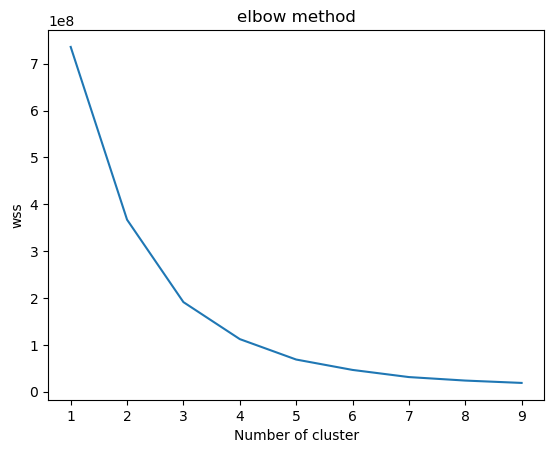

In [59]:
#apply kmean for rfm frequency to assign labels
wss=[]
rfm_frequency_cluster=rfm_frequency[["Frequency"]]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,random_state=1)
    kmean.fit(rfm_frequency_cluster)
    wss.append(kmean.inertia_)
print(wss)

#plot the wss ,elbow method
plt.plot(range(1,10),wss)
plt.xlabel("Number of cluster")
plt.ylabel("wss")
plt.title("elbow method")


>**frequency.. the optimum value is 4**

In [60]:
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(rfm_recency_cluster)
rfm_frequency["Frequency_cluster"]=kmeans.labels_
rfm_frequency

,Frequency,Frequency_cluster
Customer ID,,
12346.0,34,0
12347.0,253,1
12348.0,51,1
12349.0,175,1
12350.0,17,3
...,...,...
18283.0,986,1
18284.0,28,0
18285.0,12,2


#### frequency descriptive statistic summary

In [61]:
rfm_frequency.groupby("Frequency_cluster").describe()

Frequency                                                   \
                      count        mean         std  min    25%   50%    75%   
Frequency_cluster                                                              
0                    1110.0   56.385586  109.984813  1.0  14.25  32.0   67.0   
1                    3144.0  207.770992  463.634085  1.0  39.00  99.0  233.0   
2                     639.0   26.165884   33.769884  1.0   8.00  17.0   33.0   
3                     988.0   73.967611  107.715426  1.0  17.00  39.0   86.0   

                            
                       max  
Frequency_cluster           
0                   2796.0  
1                  12890.0  
2                    366.0  
3                   1271.0

## Monetary/Revenue

In [62]:
rfm_revenue=df.groupby("Customer ID").agg({"Total_amount":lambda x:x.sum()})
rfm_revenue=rfm_revenue.rename(columns={"Total_amount":"Revenue"})
print(rfm_revenue)
#rfm revenue descriptive summmary
rfm_revenue.describe()


                 Revenue
Customer ID             
12346.0       351.680381
12347.0      4561.903048
12348.0       787.623429
12349.0      3034.553048
12350.0       334.400000
...                  ...
18283.0      2736.650000
18284.0       423.590191
18285.0       196.820381
18286.0      1111.220762
18287.0      2670.854572

[5881 rows x 1 columns]


,Revenue
count,5881.000000
mean,1631.540161
std,4035.772933
min,0.000000
25%,259.351905
50%,667.270191
75%,1687.822667
max,193964.211102


Text(0.5, 1.0, 'Distribution for revenue')

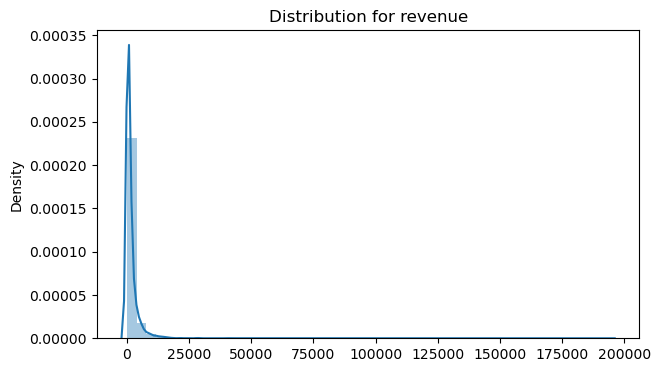

In [63]:
plt.figure(figsize=(7,4))
sns.distplot(x=rfm_revenue["Revenue"])
plt.title("Distribution for revenue")

>**Distribution of revenue is right skewed**

[95770283422.90762, 54932489788.83575, 29318949447.81212, 13203731084.199097, 7209649018.197426, 4882485305.584196, 3503108107.6431055, 2582758891.6200185, 1995612968.9471207]


Text(0.5, 1.0, 'Elbow method')

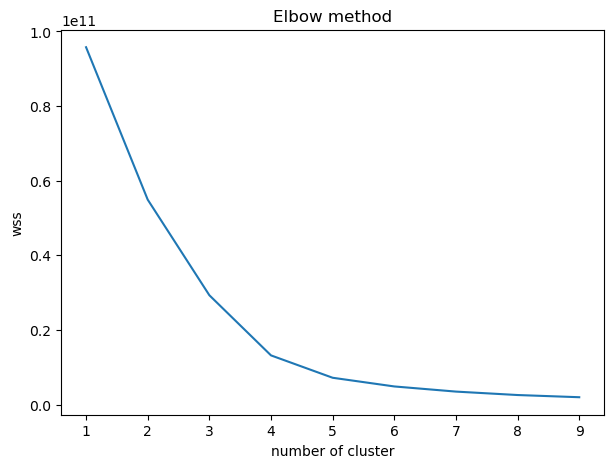

In [64]:
from sklearn.cluster import KMeans
#apply the kmeans clustering to assign the cluster for recency
wss=[]
rfm_revenue_cluster=rfm_revenue[["Revenue"]]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(rfm_revenue_cluster)
    wss.append(kmeans.inertia_)
print(wss)

#elbow method
plt.figure(figsize=(7,5))
plt.plot(range(1,10),wss)
plt.xlabel("number of cluster")
plt.ylabel("wss")
plt.title("Elbow method")

>**the 4 is optimum values**

In [65]:
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(rfm_revenue_cluster)
rfm_revenue["Revenue_cluster"]=kmeans.labels_
rfm_revenue

,Revenue,Revenue_cluster
Customer ID,,
12346.0,351.680381,0
12347.0,4561.903048,2
12348.0,787.623429,0
12349.0,3034.553048,0
12350.0,334.400000,0
...,...,...
18283.0,2736.650000,0
18284.0,423.590191,0
18285.0,196.820381,0


### descriptive statistics summary for revenue

In [66]:
rfm_revenue.groupby("Revenue_cluster").describe()

Revenue                                              \
                  count           mean           std            min   
Revenue_cluster                                                       
0                5385.0     937.370530    964.595716       0.000000   
1                  14.0   43726.904237  13180.899995   27814.409007   
2                 481.0    7777.976116   3516.522354    4363.764382   
3                   1.0  193964.211102           NaN  193964.211102   

                                                                             
                           25%            50%            75%            max  
Revenue_cluster                                                              
0                   235.110381     577.540000    1301.780000    4348.900381  
1                 30415.207296   42684.644626   54957.543400   63127.333575  
2                  5230.960762    6437.793620    9236.448764   24634.301338  
3                193964.211102  193964.211102  193964.211102  193964.211102

In [67]:
rfm_recency

,Recency,Recency_cluster
Customer ID,,
12346.0,325,0
12347.0,2,1
12348.0,75,1
12349.0,18,1
12350.0,310,3
...,...,...
18283.0,3,1
18284.0,431,0
18285.0,660,2


In [68]:
rfm_frequency

,Frequency,Frequency_cluster
Customer ID,,
12346.0,34,0
12347.0,253,1
12348.0,51,1
12349.0,175,1
12350.0,17,3
...,...,...
18283.0,986,1
18284.0,28,0
18285.0,12,2


In [69]:
rfm_revenue

,Revenue,Revenue_cluster
Customer ID,,
12346.0,351.680381,0
12347.0,4561.903048,2
12348.0,787.623429,0
12349.0,3034.553048,0
12350.0,334.400000,0
...,...,...
18283.0,2736.650000,0
18284.0,423.590191,0
18285.0,196.820381,0


In [70]:
#merging the three columns(recency,frequency,revenue)
rfm1=pd.merge(rfm_recency,rfm_frequency,on="Customer ID",how="left")
rfm2=pd.merge(rfm1,rfm_revenue,on="Customer ID",how="left")
rfm=pd.merge(cus,rfm2,on="Customer ID",how="left")
rfm

,Customer ID,NextPurchaseDay,Recency,Recency_cluster,Frequency,Frequency_cluster,Revenue,Revenue_cluster
0,13085.0,286,157,3,84,3,1687.822667,0
1,13078.0,-74,3,1,801,1,12320.275343,2
2,15362.0,56,448,0,40,0,613.080000,0
3,18102.0,-62,0,1,1058,1,13177.502042,2
4,12682.0,287,3,1,1039,1,18584.117909,2
...,...,...,...,...,...,...,...,...
5875,16000.0,140,2,1,9,1,107.191715,0
5876,15195.0,140,2,1,1,1,11.910191,0
5877,13436.0,140,1,1,12,1,196.890000,0
5878,15520.0,140,1,1,18,1,343.500000,0


In [71]:
rfm["RFM_score"]=rfm["Recency_cluster"]+rfm["Frequency_cluster"]+rfm["Revenue_cluster"]
rfm

,Customer ID,NextPurchaseDay,Recency,Recency_cluster,Frequency,Frequency_cluster,Revenue,Revenue_cluster,RFM_score
0,13085.0,286,157,3,84,3,1687.822667,0,6
1,13078.0,-74,3,1,801,1,12320.275343,2,4
2,15362.0,56,448,0,40,0,613.080000,0,0
3,18102.0,-62,0,1,1058,1,13177.502042,2,4
4,12682.0,287,3,1,1039,1,18584.117909,2,4
...,...,...,...,...,...,...,...,...,...
5875,16000.0,140,2,1,9,1,107.191715,0,2
5876,15195.0,140,2,1,1,1,11.910191,0,2
5877,13436.0,140,1,1,12,1,196.890000,0,2
5878,15520.0,140,1,1,18,1,343.500000,0,2


In [72]:
rfm["RFM_score"].unique()

array([6, 4, 0, 2, 3, 5, 8, 1])

In [73]:
rfm.groupby("RFM_score")[["Recency","Frequency","Revenue"]].mean()

,Recency,Frequency,Revenue
RFM_score,,,
0,412.180254,51.463768,580.123309
1,372.000000,2796.000000,49955.628959
2,40.793657,115.525000,1306.202198
3,4.384615,4535.000000,43247.771566
4,372.766697,268.143641,3425.006230
5,1.000000,11247.000000,193964.211102
6,212.767081,64.094203,774.881700
8,194.000000,507.500000,7051.141788


### **The cluster 5 is best customer . hight frequency and hight revenue**

In [74]:
#by using function to assign the level of cluster
def level(level):
    if ( level==0 or level==2 or level==6 or level==4):#the low level because <5000 revenue and <300 frequency
        return "Low"
    elif (level==3 or level==1):#the mid level because...>40000-<50000 revenue and >2000-<5000 frequency
        return "mid"
    else:#the high level because >100000 revenue and >10000 frequency
        return "high"
    


In [75]:
rfm["level"]=rfm["RFM_score"].apply(level)


In [76]:
rfm

,Customer ID,NextPurchaseDay,Recency,Recency_cluster,Frequency,Frequency_cluster,Revenue,Revenue_cluster,RFM_score,level
0,13085.0,286,157,3,84,3,1687.822667,0,6,Low
1,13078.0,-74,3,1,801,1,12320.275343,2,4,Low
2,15362.0,56,448,0,40,0,613.080000,0,0,Low
3,18102.0,-62,0,1,1058,1,13177.502042,2,4,Low
4,12682.0,287,3,1,1039,1,18584.117909,2,4,Low
...,...,...,...,...,...,...,...,...,...,...
5875,16000.0,140,2,1,9,1,107.191715,0,2,Low
5876,15195.0,140,2,1,1,1,11.910191,0,2,Low
5877,13436.0,140,1,1,12,1,196.890000,0,2,Low
5878,15520.0,140,1,1,18,1,343.500000,0,2,Low


In [77]:
#get dummies for level ,
rfm_data = rfm.copy()
rfm_data = pd.get_dummies(rfm_data,dtype="float")
rfm_data

,Customer ID,NextPurchaseDay,Recency,Recency_cluster,Frequency,Frequency_cluster,Revenue,Revenue_cluster,RFM_score,level_Low,level_high,level_mid
0,13085.0,286,157,3,84,3,1687.822667,0,6,1.0,0.0,0.0
1,13078.0,-74,3,1,801,1,12320.275343,2,4,1.0,0.0,0.0
2,15362.0,56,448,0,40,0,613.080000,0,0,1.0,0.0,0.0
3,18102.0,-62,0,1,1058,1,13177.502042,2,4,1.0,0.0,0.0
4,12682.0,287,3,1,1039,1,18584.117909,2,4,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5875,16000.0,140,2,1,9,1,107.191715,0,2,1.0,0.0,0.0
5876,15195.0,140,2,1,1,1,11.910191,0,2,1.0,0.0,0.0
5877,13436.0,140,1,1,12,1,196.890000,0,2,1.0,0.0,0.0
5878,15520.0,140,1,1,18,1,343.500000,0,2,1.0,0.0,0.0


In [78]:
#lets find the  next purchase indicate 1,0
#1 is purchase by next quarter
#0 is nextpurchase day >90 that is more than 90 days they purchase
def next(next):
    if next<90 and next>1:# its is chance to purchase th next quarter
        return "1"
    else:
        return "0"#it is across the 90 days from last purchase
    
rfm_data["Nextpurchase"]=rfm_data["NextPurchaseDay"].apply(next)
rfm_data.head(10)


,Customer ID,NextPurchaseDay,Recency,Recency_cluster,Frequency,Frequency_cluster,Revenue,Revenue_cluster,RFM_score,level_Low,level_high,level_mid,Nextpurchase
0,13085.0,286,157,3,84,3,1687.822667,0,6,1.0,0.0,0.0,0
1,13078.0,-74,3,1,801,1,12320.275343,2,4,1.0,0.0,0.0,0
2,15362.0,56,448,0,40,0,613.080000,0,0,1.0,0.0,0.0,1
3,18102.0,-62,0,1,1058,1,13177.502042,2,4,1.0,0.0,0.0,0
4,12682.0,287,3,1,1039,1,18584.117909,2,4,1.0,0.0,0.0,0
5,18087.0,342,98,1,88,1,1424.509145,0,2,1.0,0.0,0.0,0
6,13635.0,34,67,1,162,1,2772.210953,0,2,1.0,0.0,0.0,1
7,14110.0,146,3,1,400,1,6593.144289,2,4,1.0,0.0,0.0,0
8,12636.0,180,738,2,1,2,11.910191,0,4,1.0,0.0,0.0,0
9,17519.0,141,17,1,222,1,4125.473048,0,2,1.0,0.0,0.0,0


In [79]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        5880 non-null   float64
 1   NextPurchaseDay    5880 non-null   int32  
 2   Recency            5880 non-null   int32  
 3   Recency_cluster    5880 non-null   int32  
 4   Frequency          5880 non-null   int64  
 5   Frequency_cluster  5880 non-null   int32  
 6   Revenue            5880 non-null   float64
 7   Revenue_cluster    5880 non-null   int32  
 8   RFM_score          5880 non-null   int32  
 9   level_Low          5880 non-null   float64
 10  level_high         5880 non-null   float64
 11  level_mid          5880 non-null   float64
 12  Nextpurchase       5880 non-null   object 
dtypes: float64(5), int32(6), int64(1), object(1)
memory usage: 459.5+ KB


In [80]:
col=["Nextpurchase"]
for i in col:
    rfm_data[i]=rfm_data[i].astype("category")
    
    
rfm_data.dtypes

Customer ID           float64
NextPurchaseDay         int32
Recency                 int32
Recency_cluster         int32
Frequency               int64
Frequency_cluster       int32
Revenue               float64
Revenue_cluster         int32
RFM_score               int32
level_Low             float64
level_high            float64
level_mid             float64
Nextpurchase         category
dtype: object

In [87]:
rfm_data["Nextpurchase"].value_counts()

Nextpurchase
0    5336
1     544
Name: count, dtype: int64

Text(0.5, 1.0, 'correlation metrics')

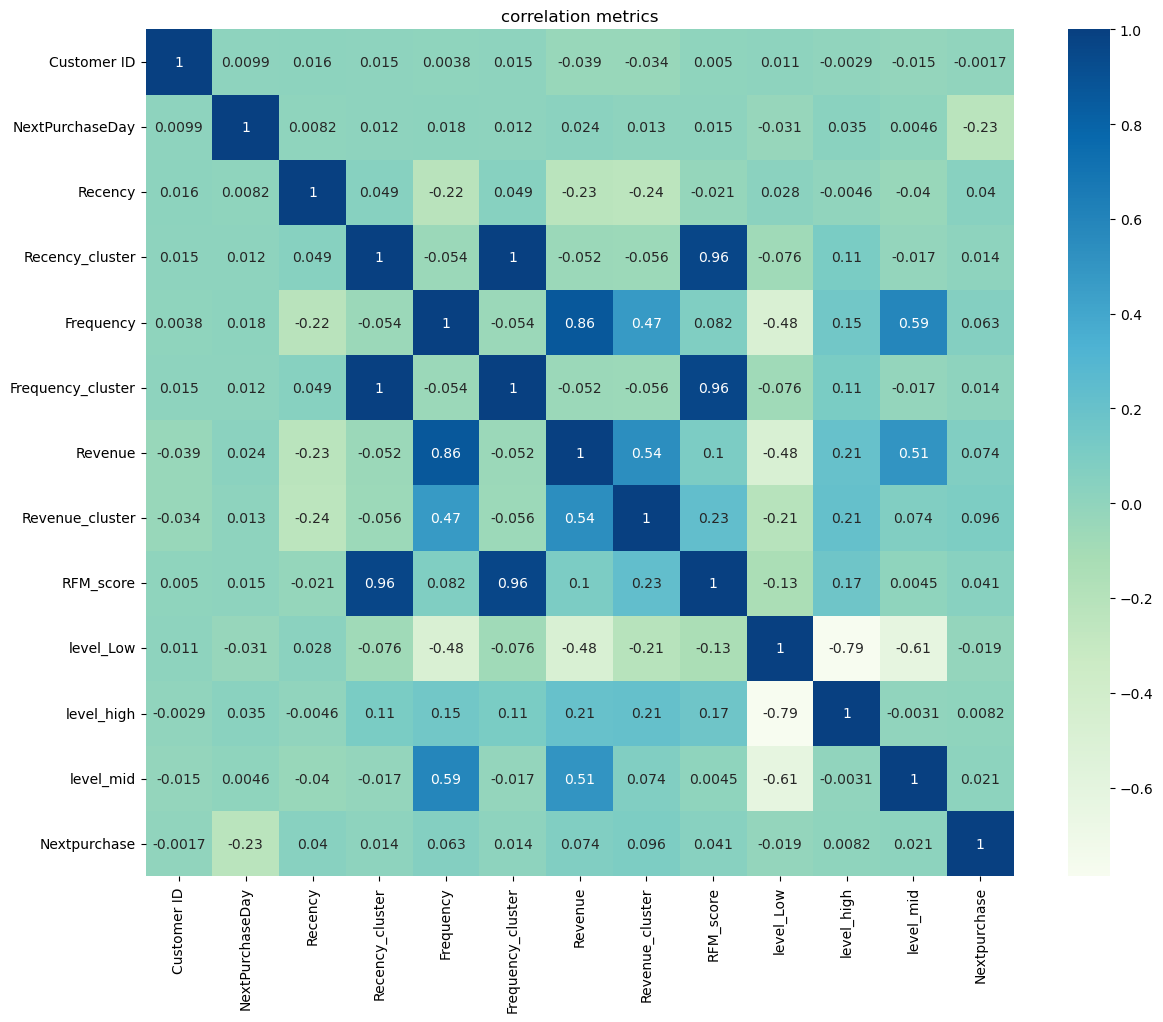

In [88]:
plt.figure(figsize=(14,11))
sns.heatmap(rfm_data.corr(),annot=True,cmap="GnBu")
plt.title('correlation metrics')

In [91]:
#rfm=rfm_data.drop(["NextpurchaseDay"],axis=1,inplace=True)
#rfm

# BUILD MACHINE LEARNING MODELS

In [92]:

X=rfm_data.drop("Nextpurchase",axis=1)
y=rfm_data["Nextpurchase"]

In [115]:
x=X.apply(zscore)
x

,Customer ID,NextPurchaseDay,Recency,Recency_cluster,Frequency,Frequency_cluster,Revenue,Revenue_cluster,RFM_score,level_Low,level_high,level_mid
0,-1.300288,0.970358,-0.210180,1.834269,-0.149823,1.834269,0.013906,-0.302271,1.703607,0.079576,-0.062665,-0.048853
1,-1.304370,-1.429746,-0.945357,-0.269193,1.876880,-0.269193,2.648470,3.328687,0.677831,0.079576,-0.062665,-0.048853
2,0.027336,-0.563041,1.179019,-1.320924,-0.274195,-1.320924,-0.252400,-0.302271,-1.373719,0.079576,-0.062665,-0.048853
3,1.624916,-1.349742,-0.959679,-0.269193,2.603327,-0.269193,2.860878,3.328687,0.677831,0.079576,-0.062665,-0.048853
4,-1.535261,0.977025,-0.945357,-0.269193,2.549621,-0.269193,4.200557,3.328687,0.677831,0.079576,-0.062665,-0.048853
...,...,...,...,...,...,...,...,...,...,...,...,...
5875,0.399327,-0.003017,-0.950131,-0.269193,-0.361821,-0.269193,-0.377751,-0.302271,-0.347944,0.079576,-0.062665,-0.048853
5876,-0.070035,-0.003017,-0.950131,-0.269193,-0.384434,-0.269193,-0.401361,-0.302271,-0.347944,0.079576,-0.062665,-0.048853
5877,-1.095635,-0.003017,-0.954905,-0.269193,-0.353341,-0.269193,-0.355525,-0.302271,-0.347944,0.079576,-0.062665,-0.048853
5878,0.119459,-0.003017,-0.954905,-0.269193,-0.336381,-0.269193,-0.319198,-0.302271,-0.347944,0.079576,-0.062665,-0.048853


In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=None)
print("----------------------------------------------------------------------------")
print((" The x trains data is : {0:0.2f}%".format((len(x_train)/len(rfm_data))*100)),x_train.shape)
print((" The y trains data is : {0:0.2f}%".format((len(y_train)/len(rfm_data))*100)),y_train.shape)
print((" The x test data is : {0:0.2f}%".format((len(x_test)/len(rfm_data))*100)),x_test.shape)
print((" The y test data is : {0:0.2f}%".format((len(y_test)/len(rfm_data))*100)),y_test.shape)
print("-------------------------------------------------------------------------")



----------------------------------------------------------------------------
 The x trains data is : 70.00% (4116, 12)
 The y trains data is : 70.00% (4116,)
 The x test data is : 30.00% (1764, 12)
 The y test data is : 30.00% (1764,)
-------------------------------------------------------------------------


### Logestic model


In [117]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_pre=log.predict(x_test)

print("training data:",log.score(x_train,y_train))
print("testing data:",log.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,log_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,log_pre)*100,2),"%")
print("-----------------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,log_pre)

training data: 0.9042759961127308
testing data: 0.9143990929705216
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1613
           1       0.00      0.00      0.00       151

    accuracy                           0.91      1764
   macro avg       0.46      0.50      0.48      1764
weighted avg       0.84      0.91      0.87      1764

-----------------------------------------------------------------
accuracy score:  91.44 %
-----------------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [ 151,    0]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

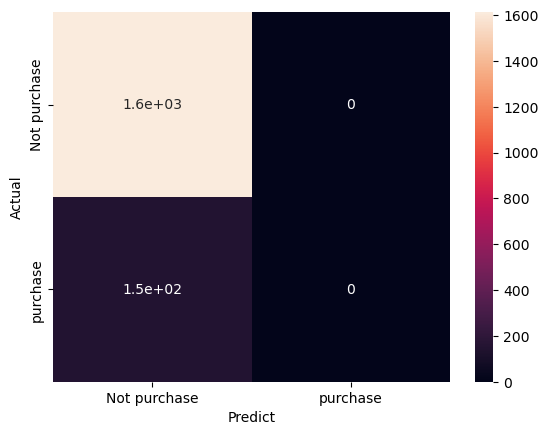

In [118]:
cm=metrics.confusion_matrix(y_test,log_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

### KNN model


In [119]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pre=log.predict(x_test)

print("training data:",knn.score(x_train,y_train))
print("testing data:",knn.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,knn_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,knn_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,knn_pre)

training data: 0.9771622934888241
testing data: 0.9642857142857143
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1613
           1       0.00      0.00      0.00       151

    accuracy                           0.91      1764
   macro avg       0.46      0.50      0.48      1764
weighted avg       0.84      0.91      0.87      1764

-----------------------------------------------------------------
accuracy score:  91.44 %
-----------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [ 151,    0]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

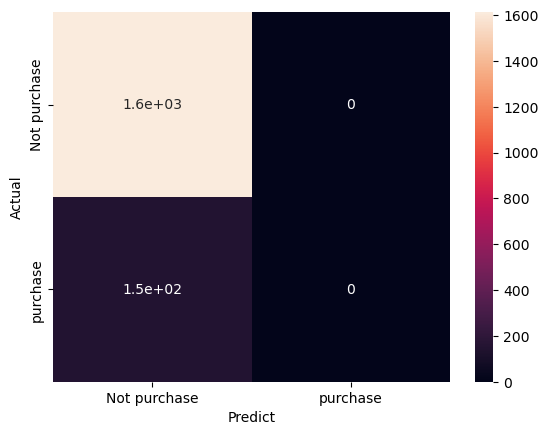

In [120]:
cm=metrics.confusion_matrix(y_test,knn_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

##### find the optitmum k neighbors for knn**

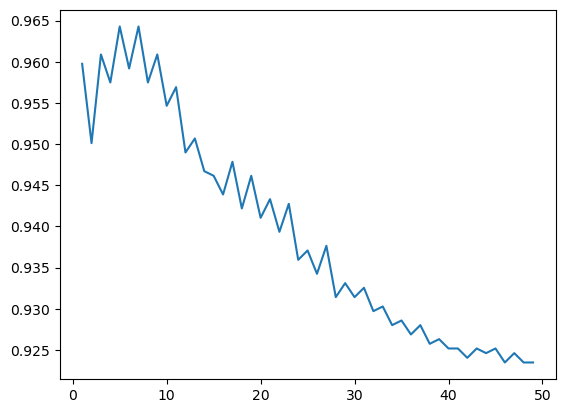

In [121]:
test_score=[]

for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn_pre=log.predict(x_test)
    test_score.append(knn.score(x_test,y_test))
#plot the test score to find the optimum k value for 
plt.plot(range(1,50),test_score)

plt.show()

>**use K = 5,  get the maximum score**

### Navie Bayes model

In [122]:
nb=GaussianNB()#by using default parameter
nb.fit(x_train,y_train)
nb_pre=log.predict(x_test)#predict the test values


print("training data:",nb.score(x_train,y_train))
print("testing data:",nb.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,nb_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,nb_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,nb_pre)



training data: 0.9093780369290574
testing data: 0.9223356009070295
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1613
           1       0.00      0.00      0.00       151

    accuracy                           0.91      1764
   macro avg       0.46      0.50      0.48      1764
weighted avg       0.84      0.91      0.87      1764

-----------------------------------------------------------------
accuracy score:  91.44 %
-----------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [ 151,    0]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

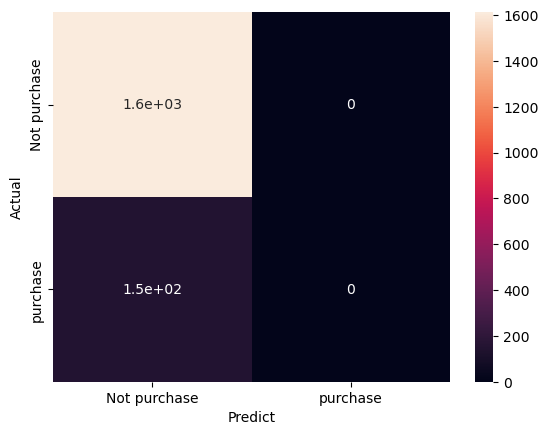

In [123]:
cm=metrics.confusion_matrix(y_test,nb_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

### SVM MODEL

In [124]:
svc=SVC()#by using default parameter
svc.fit(x_train,y_train)
svc_pre=log.predict(x_test)#predict the test values


print("training data:",svc.score(x_train,y_train))
print("testing data:",svc.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,svc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,svc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,svc_pre)



training data: 0.9045189504373178
testing data: 0.9143990929705216
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1613
           1       0.00      0.00      0.00       151

    accuracy                           0.91      1764
   macro avg       0.46      0.50      0.48      1764
weighted avg       0.84      0.91      0.87      1764

-----------------------------------------------------------------
accuracy score:  91.44 %
-----------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [ 151,    0]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

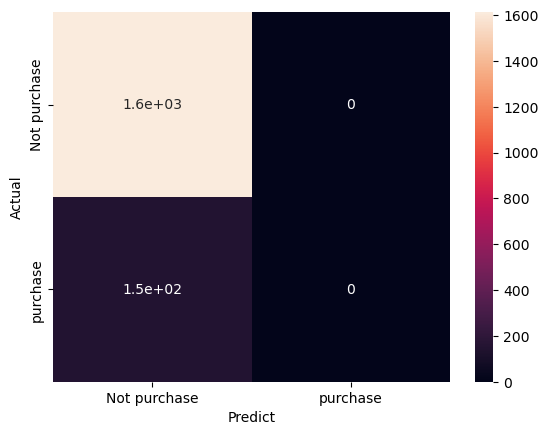

In [125]:
cm=metrics.confusion_matrix(y_test,svc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

### Random forest

In [126]:
rfc=RandomForestClassifier(random_state=0)#by using default parameter
rfc.fit(x_train,y_train)
rfc_pre=log.predict(x_test)#predict the test values


print("training data:",rfc.score(x_train,y_train))
print("testing data:",rfc.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,rfc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,rfc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,rfc_pre)



training data: 1.0
testing data: 0.9994331065759637
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1613
           1       0.00      0.00      0.00       151

    accuracy                           0.91      1764
   macro avg       0.46      0.50      0.48      1764
weighted avg       0.84      0.91      0.87      1764

-----------------------------------------------------------------
accuracy score:  91.44 %
-----------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [ 151,    0]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

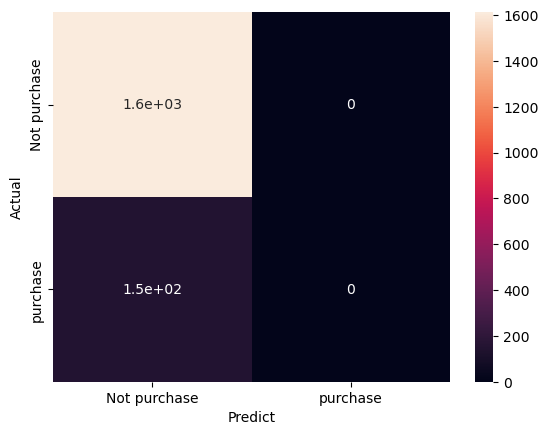

In [127]:
cm=metrics.confusion_matrix(y_test,rfc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

### find the optimum no of tree for random forest model

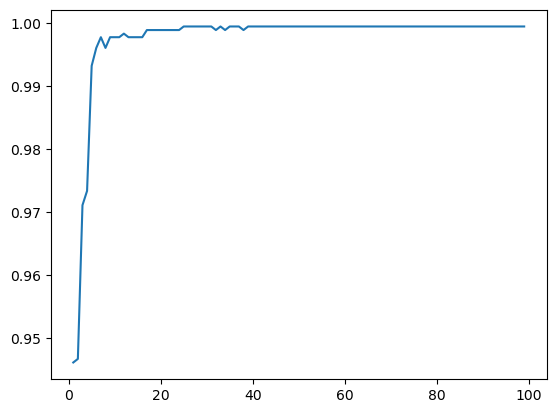

In [128]:
test_score=[]

for k in range(1,100):
    rfc=RandomForestClassifier(n_estimators=k,random_state=0)#by using default parameter
    rfc.fit(x_train,y_train)
    rfc_pre=rfc.predict(x_test)
    test_score.append(rfc.score(x_test,y_test))
#plot the test score to find the optimum k value for 
plt.plot(range(1,100),test_score)

plt.show()

### Decision tees

In [129]:
d_tree=DecisionTreeClassifier(random_state=0)#by using default parameter
d_tree.fit(x_train,y_train)
d_tree_pre=d_tree.predict(x_test)#predict the test values


print("training data:",d_tree.score(x_train,y_train))
print("testing data:",d_tree.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,d_tree_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,d_tree_pre)*100,2),"%")

print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,d_tree_pre)


training data: 1.0
testing data: 1.0
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1613
           1       1.00      1.00      1.00       151

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764

-----------------------------------------------------------------
accuracy score:  100.0 %
-----------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [   0,  151]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

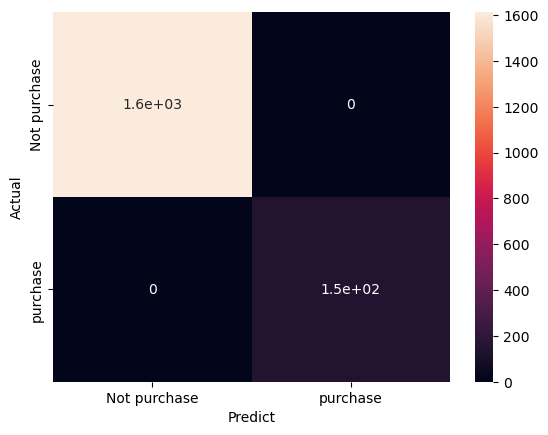

In [130]:
cm=metrics.confusion_matrix(y_test,d_tree_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

## Best Model selection by using K-Fold CV and Hyperparameter Tuning via grid search CV

### kfold cv

In [131]:
Lr=LogisticRegression()
Knn=KNeighborsClassifier(n_neighbors=13)
Gn=GaussianNB()
Rf=RandomForestClassifier(n_estimators=9)
svc=SVC()
D_Tree=DecisionTreeClassifier()

In [132]:

models = []
models.append(('LR', Lr))
models.append(('KNN', Knn))
models.append(('NB', Gn))
models.append(("svc",svc))
models.append(("Rf",Rf))
models.append(("Dt",D_Tree))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model,  x,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.903741 (0.093930)
KNN: 0.951020 (0.047429)
NB: 0.890136 (0.127599)
svc: 0.907483 (0.089525)
Rf: 0.998299 (0.003042)
Dt: 1.000000 (0.000000)


>**by using kfold cv decision tree classifier is best accuracy using deafult paramter**

#### model improvement

#### tuning the all model and find which one is best model
#### Random forest model

In [133]:

params = {'n_estimators':[10,50,100],"criterion":["gini","entropy"]}#parameter

clf = RandomForestClassifier(random_state=0)#model 
gs = GridSearchCV(clf, params, scoring='accuracy',cv=5)
gs.fit(x_train, y_train)

print("Best set of Parameters",gs.best_params_)
print("Best Score",gs.best_score_)
df1=pd.DataFrame(gs.cv_results_)
df1=df1[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df1.insert(loc=0, column="model_name", value="Random_Forest")#assign new column in model name  use to verify the model parameter
df1

Best set of Parameters {'criterion': 'entropy', 'n_estimators': 100}
Best Score 0.9995145631067961


,model_name,params,mean_test_score
5,Random_Forest,"{'criterion': 'entropy', 'n_estimators': 100}",0.999515
1,Random_Forest,"{'criterion': 'gini', 'n_estimators': 50}",0.999272
2,Random_Forest,"{'criterion': 'gini', 'n_estimators': 100}",0.999272
4,Random_Forest,"{'criterion': 'entropy', 'n_estimators': 50}",0.998786
0,Random_Forest,"{'criterion': 'gini', 'n_estimators': 10}",0.998056


### Logistic model

In [134]:

params = {'solver':["liblinear","lbfgs"],"penalty":["l1","l2","elasticent"],"C":[0.1,1,10,20],"class_weight":['balanced',"uniform"]}#model perameter

clf = LogisticRegression(random_state=0)#model
lr = GridSearchCV(clf, params, scoring='accuracy',cv=5)
lr.fit(x_train, y_train)

print("Best set of Parameters",lr.best_params_)
print("Best Score",lr.best_score_)
df2=pd.DataFrame(lr.cv_results_)
df2
df2=df2[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df2.insert(loc=0, column="model_name", value="Logistic")#assign new column in model name  use to verify the model parameter
df2

Best set of Parameters {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Score 0.8012640234047824


,model_name,params,mean_test_score
0,Logistic,"{'C': 0.1, 'class_weight': 'balanced', 'penalt...",0.801264
12,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.799321
14,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.799321
15,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.799321
24,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.799321


#### KNN

In [135]:

params = {'n_neighbors':[1,3,5,7,9,11],"metric":["euclidean","manhattan","chebyshev"]}#knn parameter

clf = KNeighborsClassifier()#model
knn = GridSearchCV(clf, params, scoring='accuracy',cv=5)
knn.fit(x_train, y_train)

print("Best set of Parameters",knn.best_params_)
print("Best Score",knn.best_score_)
df3=pd.DataFrame(knn.cv_results_)
df3
df3=df3[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df3.insert(loc=0, column="model_name", value="KNN")#assign new column in model name  use to verify the model parameter
df3

Best set of Parameters {'metric': 'euclidean', 'n_neighbors': 3}
Best Score 0.9596692187002324


,model_name,params,mean_test_score
1,KNN,"{'metric': 'euclidean', 'n_neighbors': 3}",0.959669
7,KNN,"{'metric': 'manhattan', 'n_neighbors': 3}",0.958940
2,KNN,"{'metric': 'euclidean', 'n_neighbors': 5}",0.957727
0,KNN,"{'metric': 'euclidean', 'n_neighbors': 1}",0.956996
8,KNN,"{'metric': 'manhattan', 'n_neighbors': 5}",0.956756


#### decison tree

In [136]:

params = {'splitter':["best","random"],"criterion":["gini","entropy","log_loss"]}#parameter

clf = DecisionTreeClassifier()#model
dt = GridSearchCV(clf, params, scoring='accuracy',cv=5)
dt.fit(x_train, y_train)

print("Best set of Parameters",dt.best_params_)
print("Best Score",dt.best_score_)
df4=pd.DataFrame(dt.cv_results_)
df4
df4=df4[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df4.insert(loc=0, column="model_name", value="decision tree")#assign new column in model name  use to verify the model parameter
df4

Best set of Parameters {'criterion': 'gini', 'splitter': 'best'}
Best Score 0.9997569866342649


,model_name,params,mean_test_score
0,decision tree,"{'criterion': 'gini', 'splitter': 'best'}",0.999757
2,decision tree,"{'criterion': 'entropy', 'splitter': 'best'}",0.999757
4,decision tree,"{'criterion': 'log_loss', 'splitter': 'best'}",0.999757
1,decision tree,"{'criterion': 'gini', 'splitter': 'random'}",0.996598
5,decision tree,"{'criterion': 'log_loss', 'splitter': 'random'}",0.993196


### Naive nayes

In [137]:

params = {"var_smoothing":np.logspace(0,-9,num=100)}#parameter

clf = GaussianNB()#model
gnb = GridSearchCV(clf, params, scoring='accuracy',cv=5)
gnb.fit(x_train, y_train)

print("Best set of Parameters",gnb.best_params_)
print("Best Score",gnb.best_score_)
df5=pd.DataFrame(gnb.cv_results_)
df5
df5=df5[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df5.insert(loc=0, column="model_name", value="gaussian")#assign new column in model name  use to verify the model parameter
df5

Best set of Parameters {'var_smoothing': 0.0002848035868435802}
Best Score 0.9113219455225379


,model_name,params,mean_test_score
50,gaussian,{'var_smoothing': 2.848035868435799e-05},0.911322
75,gaussian,{'var_smoothing': 1.519911082952933e-07},0.911322
73,gaussian,{'var_smoothing': 2.310129700083158e-07},0.911322
72,gaussian,{'var_smoothing': 2.848035868435799e-07},0.911322
71,gaussian,{'var_smoothing': 3.5111917342151277e-07},0.911322


In [138]:
svm = GridSearchCV(SVC(gamma='auto'), {
        'C': [0.1,1,10,20],
        'kernel': ['rbf','linear',"poly"]
    }, 
    cv=5, 
    scoring="accuracy"
)
svm.fit(x_train,y_train)
print("best set of parameter",svm.best_params_)
print("best score:",svm.best_score_)
df6=pd.DataFrame(svm.cv_results_)
df6=df6[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df6.insert(loc=0, column="model_name", value="svm")#assign new column in model name  use to verify the model parameter
df6

best set of parameter {'C': 20, 'kernel': 'rbf'}
best score: 0.9659863865328127


,model_name,params,mean_test_score
9,svm,"{'C': 20, 'kernel': 'rbf'}",0.965986
6,svm,"{'C': 10, 'kernel': 'rbf'}",0.932458
0,svm,"{'C': 0.1, 'kernel': 'rbf'}",0.904519
1,svm,"{'C': 0.1, 'kernel': 'linear'}",0.904519
3,svm,"{'C': 1, 'kernel': 'rbf'}",0.904519


## Choose the best model

In [139]:
best_model=pd.concat([df1,df2,df3,df4,df5,df6])
best_model

,model_name,params,mean_test_score
5,Random_Forest,"{'criterion': 'entropy', 'n_estimators': 100}",0.999515
1,Random_Forest,"{'criterion': 'gini', 'n_estimators': 50}",0.999272
2,Random_Forest,"{'criterion': 'gini', 'n_estimators': 100}",0.999272
4,Random_Forest,"{'criterion': 'entropy', 'n_estimators': 50}",0.998786
0,Random_Forest,"{'criterion': 'gini', 'n_estimators': 10}",0.998056
0,Logistic,"{'C': 0.1, 'class_weight': 'balanced', 'penalt...",0.801264
12,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.799321
14,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.799321
15,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.799321
24,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.799321


In [140]:
best_model=best_model.sort_values(["mean_test_score"],ascending=False)
best_model

,model_name,params,mean_test_score
0,decision tree,"{'criterion': 'gini', 'splitter': 'best'}",0.999757
2,decision tree,"{'criterion': 'entropy', 'splitter': 'best'}",0.999757
4,decision tree,"{'criterion': 'log_loss', 'splitter': 'best'}",0.999757
5,Random_Forest,"{'criterion': 'entropy', 'n_estimators': 100}",0.999515
2,Random_Forest,"{'criterion': 'gini', 'n_estimators': 100}",0.999272
1,Random_Forest,"{'criterion': 'gini', 'n_estimators': 50}",0.999272
4,Random_Forest,"{'criterion': 'entropy', 'n_estimators': 50}",0.998786
0,Random_Forest,"{'criterion': 'gini', 'n_estimators': 10}",0.998056
1,decision tree,"{'criterion': 'gini', 'splitter': 'random'}",0.996598
5,decision tree,"{'criterion': 'log_loss', 'splitter': 'random'}",0.993196


>**The decision tree classifer is a best model**

### Finally select the best model and assign best parameter

In [141]:
decision_tree=DecisionTreeClassifier(random_state=0,criterion="gini",splitter="best")#by using default parameter
decision_tree.fit(x_train,y_train)
d_tree_pre=d_tree.predict(x_test)#predict the test values


print("training data:",decision_tree.score(x_train,y_train))
print("testing data:",decision_tree.score(x_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,d_tree_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,d_tree_pre)*100,2),"%")


print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,d_tree_pre)



training data: 1.0
testing data: 1.0
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1613
           1       1.00      1.00      1.00       151

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764

-----------------------------------------------------------------
accuracy score:  100.0 %
-----------------------------------------------------------------
confusion matrix


array([[1613,    0],
       [   0,  151]], dtype=int64)

#### confusion matrix

Text(50.72222222222221, 0.5, 'Actual')

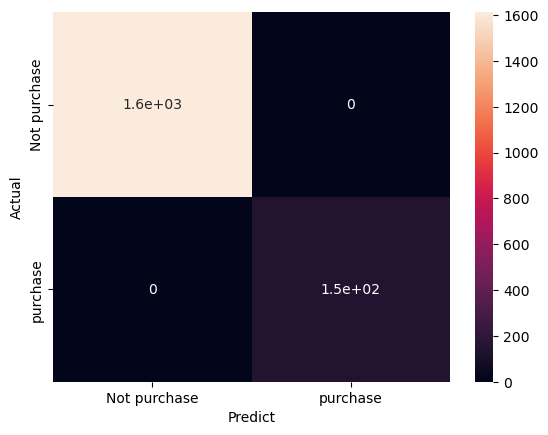

In [142]:
cm=metrics.confusion_matrix(y_test,d_tree_pre)
df_cm=pd.DataFrame(cm,index=[c for c in ["Not purchase","purchase"]],
                  columns=[c for c in ["Not purchase","purchase"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

>**the decision tree classifier predict best accuracy.there iis  no false positive and false negative**

## plot the ROC AUC Graph for decision tree classifier

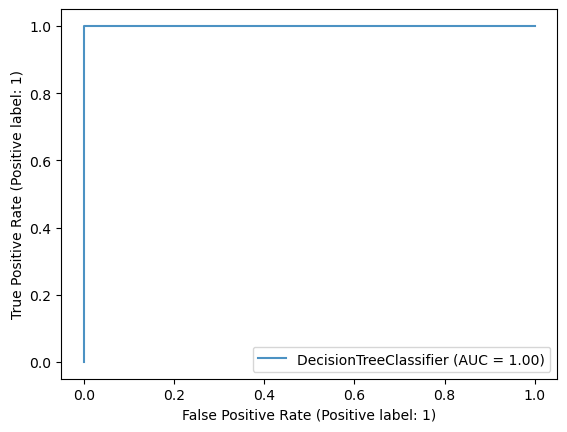

In [143]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(decision_tree, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
## prediction
#x=[[13085.0,28,157,3,84,3,1687.822667,0,6,1.0,0.0,0.0]]
#decision_tree.predict(x)


#array(['0'], dtype=object)


### pickle the model/saving the trained model

In [148]:
import pickle
filename="trained_model.pkl"
pickle.dump(decision_tree,open(filename,"wb"))


In [149]:
#loading the saved model
loaded_model=pickle.load(open("trained_model.pkl","rb"))#rb reading the binary format

##### 